# A Comparative Analysis of Regression Models for Predicting Life Expectancy Using WHO and Statistics Canada Dataset

## Data Loading

In [99]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


### WHO Dataset

In [80]:
# Load WHO dataset
who_df = pd.read_csv('who.csv')
print("\nShape of WHO dataset:", who_df.shape)
print("WHO Dataset:")
who_df.head()


Shape of WHO dataset: (2938, 22)
WHO Dataset:


Country  Year      Status  Lifeexpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   
4  Afghanistan  2011  Developing            59.2           275.0   

   infantdeaths  Alcohol  percentageexpenditure  HepatitisB  Measles  ...  \
0            62     0.01              71.279624        65.0     1154  ...   
1            64     0.01              73.523582        62.0      492  ...   
2            66     0.01              73.219243        64.0      430  ...   
3            69     0.01              78.184215        67.0     2787  ...   
4            71     0.01               7.097109        68.0     3013  ...   

   Polio  Totalexpenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0              8.16        65.0       0.1  584.259210  33736494.0   
1   58.0              8.18        62.0       0.1  612.696514    327582.0   
2   62.0              8.13        64.0       0.1  631.744976  31731688.0   
3   67.0              8.52        67.0       0.1  669.959000   3696958.0   
4   68.0              7.87        68.0       0.1   63.537231   2978599.0   

   thinness1-19years  thinness5-9years  Incomecompositionofresources  \
0               17.2              17.3                         0.479   
1               17.5              17.5                         0.476   
2               17.7              17.7                         0.470   
3               17.9              18.0                         0.463   
4               18.2              18.2                         0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

### Canada Dataset

In [81]:
# Load Canada dataset
canada_df = pd.read_csv('canada.csv')
print("\nShape of Canada dataset:", canada_df.shape)
print("\nCanada Dataset:")
canada_df.head()


Shape of Canada dataset: (1408, 18)

Canada Dataset:


REF_DATE     GEO  DGUID Age group    Sex       Income group  \
0      2001  Canada    NaN  At birth  Males  All income groups   
1      2001  Canada    NaN  At birth  Males  All income groups   
2      2001  Canada    NaN  At birth  Males  All income groups   
3      2001  Canada    NaN  At birth  Males  All income groups   
4      2001  Canada    NaN  At birth  Males  All income groups   

                                     Characteristics    UOM  UOM_ID  \
0                    Health-adjusted life expectancy  Years     308   
1  Low 95% confidence interval, health-adjusted l...  Years     308   
2  High 95% confidence interval, health-adjusted ...  Years     308   
3  Coefficient of variation for health-adjusted l...  Years     308   
4                                    Life expectancy  Years     308   

  SCALAR_FACTOR  SCALAR_ID     VECTOR COORDINATE  VALUE  STATUS  SYMBOL  \
0        units           0  v28463422  1.1.2.1.1   68.3     NaN     NaN   
1        units           0  v28464321  1.1.2.1.2   68.1     NaN     NaN   
2        units           0  v28464322  1.1.2.1.3   68.5     NaN     NaN   
3        units           0  v28464323  1.1.2.1.4    0.1     NaN     NaN   
4        units           0  v28463423  1.1.2.1.5   76.9     NaN     NaN   

   TERMINATED  DECIMALS  
0         NaN         1  
1         NaN         1  
2         NaN         1  
3         NaN         1  
4         NaN         1

In [101]:
print(who_df.columns)


Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')


In [102]:
print(canada_df.columns)

Index(['REF_DATE', 'GEO', 'DGUID', 'Age group', 'Sex', 'Income group',
       'Characteristics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')


## Data Description and Basic Understanding

### WHO Dataset

In [82]:
# Summary statistics
who_df.describe()

Year  Lifeexpectancy  AdultMortality  infantdeaths      Alcohol  \
count  2938.000000     2928.000000     2928.000000   2938.000000  2744.000000   
mean   2007.518720       69.224932      164.796448     30.303948     4.602861   
std       4.613841        9.523867      124.292079    117.926501     4.052413   
min    2000.000000       36.300000        1.000000      0.000000     0.010000   
25%    2004.000000       63.100000       74.000000      0.000000     0.877500   
50%    2008.000000       72.100000      144.000000      3.000000     3.755000   
75%    2012.000000       75.700000      228.000000     22.000000     7.702500   
max    2015.000000       89.000000      723.000000   1800.000000    17.870000   

       percentageexpenditure   HepatitisB        Measles          BMI  \
count            2938.000000  2385.000000    2938.000000  2904.000000   
mean              738.251295    80.940461    2419.592240    38.321247   
std              1987.914858    25.070016   11467.272489    20.044034   
min                 0.000000     1.000000       0.000000     1.000000   
25%                 4.685343    77.000000       0.000000    19.300000   
50%                64.912906    92.000000      17.000000    43.500000   
75%               441.534144    97.000000     360.250000    56.200000   
max             19479.911610    99.000000  212183.000000    87.300000   

       under-fivedeaths        Polio  Totalexpenditure   Diphtheria  \
count       2938.000000  2919.000000        2712.00000  2919.000000   
mean          42.035739    82.550188           5.93819    82.324084   
std          160.445548    23.428046           2.49832    23.716912   
min            0.000000     3.000000           0.37000     2.000000   
25%            0.000000    78.000000           4.26000    78.000000   
50%            4.000000    93.000000           5.75500    93.000000   
75%           28.000000    97.000000           7.49250    97.000000   
max         2500.000000    99.000000          17.60000    99.000000   

          HIV/AIDS            GDP    Population  thinness1-19years  \
count  2938.000000    2490.000000  2.286000e+03        2904.000000   
mean      1.742103    7483.158469  1.275338e+07           4.839704   
std       5.077785   14270.169342  6.101210e+07           4.420195   
min       0.100000       1.681350  3.400000e+01           0.100000   
25%       0.100000     463.935626  1.957932e+05           1.600000   
50%       0.100000    1766.947595  1.386542e+06           3.300000   
75%       0.800000    5910.806335  7.420359e+06           7.200000   
max      50.600000  119172.741800  1.293859e+09          27.700000   

       thinness5-9years  Incomecompositionofresources    Schooling  
count       2904.000000                   2771.000000  2775.000000  
mean           4.870317                      0.627551    11.992793  
std            4.508882                      0.210904     3.358920  
min            0.100000                      0.000000     0.000000  
25%            1.500000                      0.493000    10.100000  
50%            3.300000                      0.677000    12.300000  
75%            7.200000                      0.779000    14.300000  
max           28.600000                      0.948000    20.700000

In [83]:
# Check data types
print("\nData types:")
who_df.dtypes


Data types:


Country                          object
Year                              int64
Status                           object
Lifeexpectancy                  float64
AdultMortality                  float64
infantdeaths                      int64
Alcohol                         float64
percentageexpenditure           float64
HepatitisB                      float64
Measles                           int64
BMI                             float64
under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
HIV/AIDS                        float64
GDP                             float64
Population                      float64
thinness1-19years               float64
thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
dtype: object

In [84]:
# Check for missing values
print("\nMissing values:")
print(who_df.isnull().sum())


Missing values:
Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64



Unique values in Country:
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'AntiguaandBarbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia(PlurinationalStateof)' 'BosniaandHerzegovina'
 'Botswana' 'Brazil' 'BruneiDarussalam' 'Bulgaria' 'BurkinaFaso' 'Burundi'
 "Côted'Ivoire" 'CaboVerde' 'Cambodia' 'Cameroon' 'Canada'
 'CentralAfricanRepublic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'CookIslands' 'CostaRica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "DemocraticPeople'sRepublicofKorea" 'DemocraticRepublicoftheCongo'
 'Denmark' 'Djibouti' 'Dominica' 'DominicanRepublic' 'Ecuador' 'Egypt'
 'ElSalvador' 'EquatorialGuinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran(IslamicRepublicof)' '

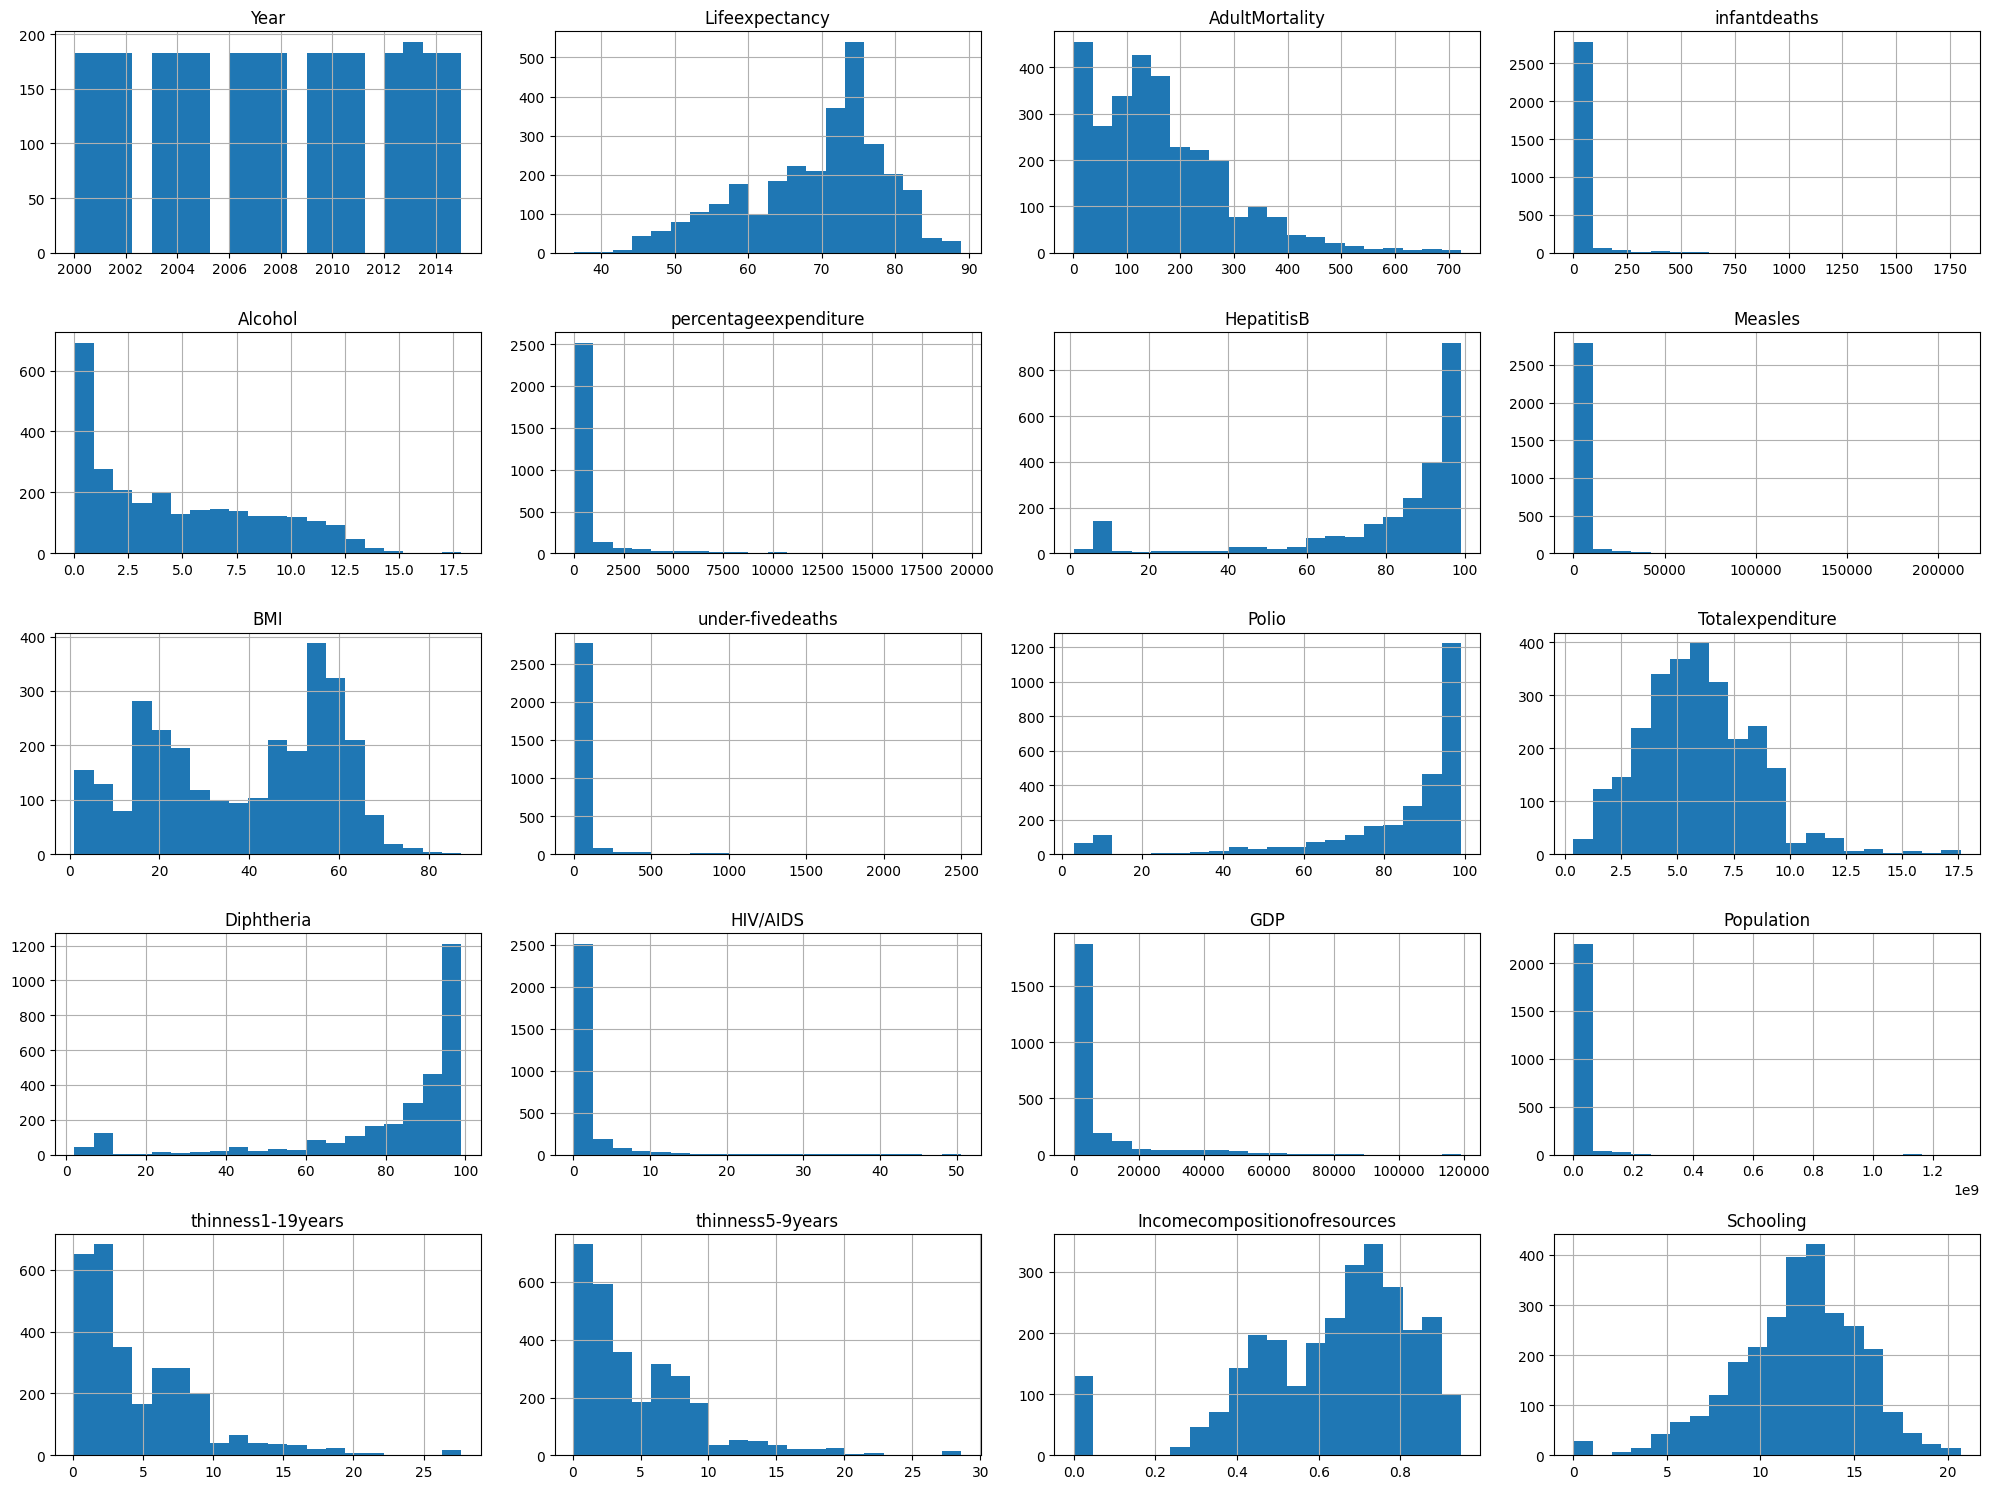

In [85]:
# Unique values in categorical columns
categorical_columns = who_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(who_df[col].unique())

# Distribution of numerical variables
numerical_columns = who_df.select_dtypes(include=['float64', 'int64']).columns
who_df[numerical_columns].hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

### Canada Dataset

In [86]:
# Summary statistics
canada_df.describe()

REF_DATE  DGUID  UOM_ID  SCALAR_ID        VALUE  STATUS  SYMBOL  \
count    1408.0    0.0  1408.0     1408.0  1408.000000     0.0     0.0   
mean     2001.0    NaN   308.0        0.0    34.053977     NaN     NaN   
std         0.0    NaN     0.0        0.0    31.831615     NaN     NaN   
min      2001.0    NaN   308.0        0.0     0.000000     NaN     NaN   
25%      2001.0    NaN   308.0        0.0     8.900000     NaN     NaN   
50%      2001.0    NaN   308.0        0.0    17.100000     NaN     NaN   
75%      2001.0    NaN   308.0        0.0    70.400000     NaN     NaN   
max      2001.0    NaN   308.0        0.0    83.800000     NaN     NaN   

       TERMINATED  DECIMALS  
count         0.0    1408.0  
mean          NaN       1.0  
std           NaN       0.0  
min           NaN       1.0  
25%           NaN       1.0  
50%           NaN       1.0  
75%           NaN       1.0  
max           NaN       1.0

In [87]:
# Check data types
print("\nData types:")
print(canada_df.dtypes)


Data types:
REF_DATE             int64
GEO                 object
DGUID              float64
Age group           object
Sex                 object
Income group        object
Characteristics     object
UOM                 object
UOM_ID               int64
SCALAR_FACTOR       object
SCALAR_ID            int64
VECTOR              object
COORDINATE          object
VALUE              float64
STATUS             float64
SYMBOL             float64
TERMINATED         float64
DECIMALS             int64
dtype: object


In [88]:
# Check for missing values
print("\nMissing values:")
print(canada_df.isnull().sum())


Missing values:
REF_DATE              0
GEO                   0
DGUID              1408
Age group             0
Sex                   0
Income group          0
Characteristics       0
UOM                   0
UOM_ID                0
SCALAR_FACTOR         0
SCALAR_ID             0
VECTOR                0
COORDINATE            0
VALUE                 0
STATUS             1408
SYMBOL             1408
TERMINATED         1408
DECIMALS              0
dtype: int64



Unique values in GEO:
['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']

Unique values in Age group:
['At birth' 'At age 65']

Unique values in Sex:
['Males' 'Females']

Unique values in Income group:
['All income groups' 'Income group, tercile 1 (lowest)'
 'Income group, tercile 2 (middle)' 'Income group, tercile 3 (highest)']

Unique values in Characteristics:
['Health-adjusted life expectancy'
 'Low 95% confidence interval, health-adjusted life expectancy'
 'High 95% confidence interval, health-adjusted life expectancy'
 'Coefficient of variation for health-adjusted life expectancy'
 'Life expectancy' 'Low 95% confidence interval, life expectancy'
 'High 95% confidence interval, life expectancy'
 'Coefficient of variation for life expectancy']

Unique values in UOM:
['Years']

Unique values in SCALAR_FACTOR:
['units ']

Unique values in VECTOR:
['v28463422' 'v284643

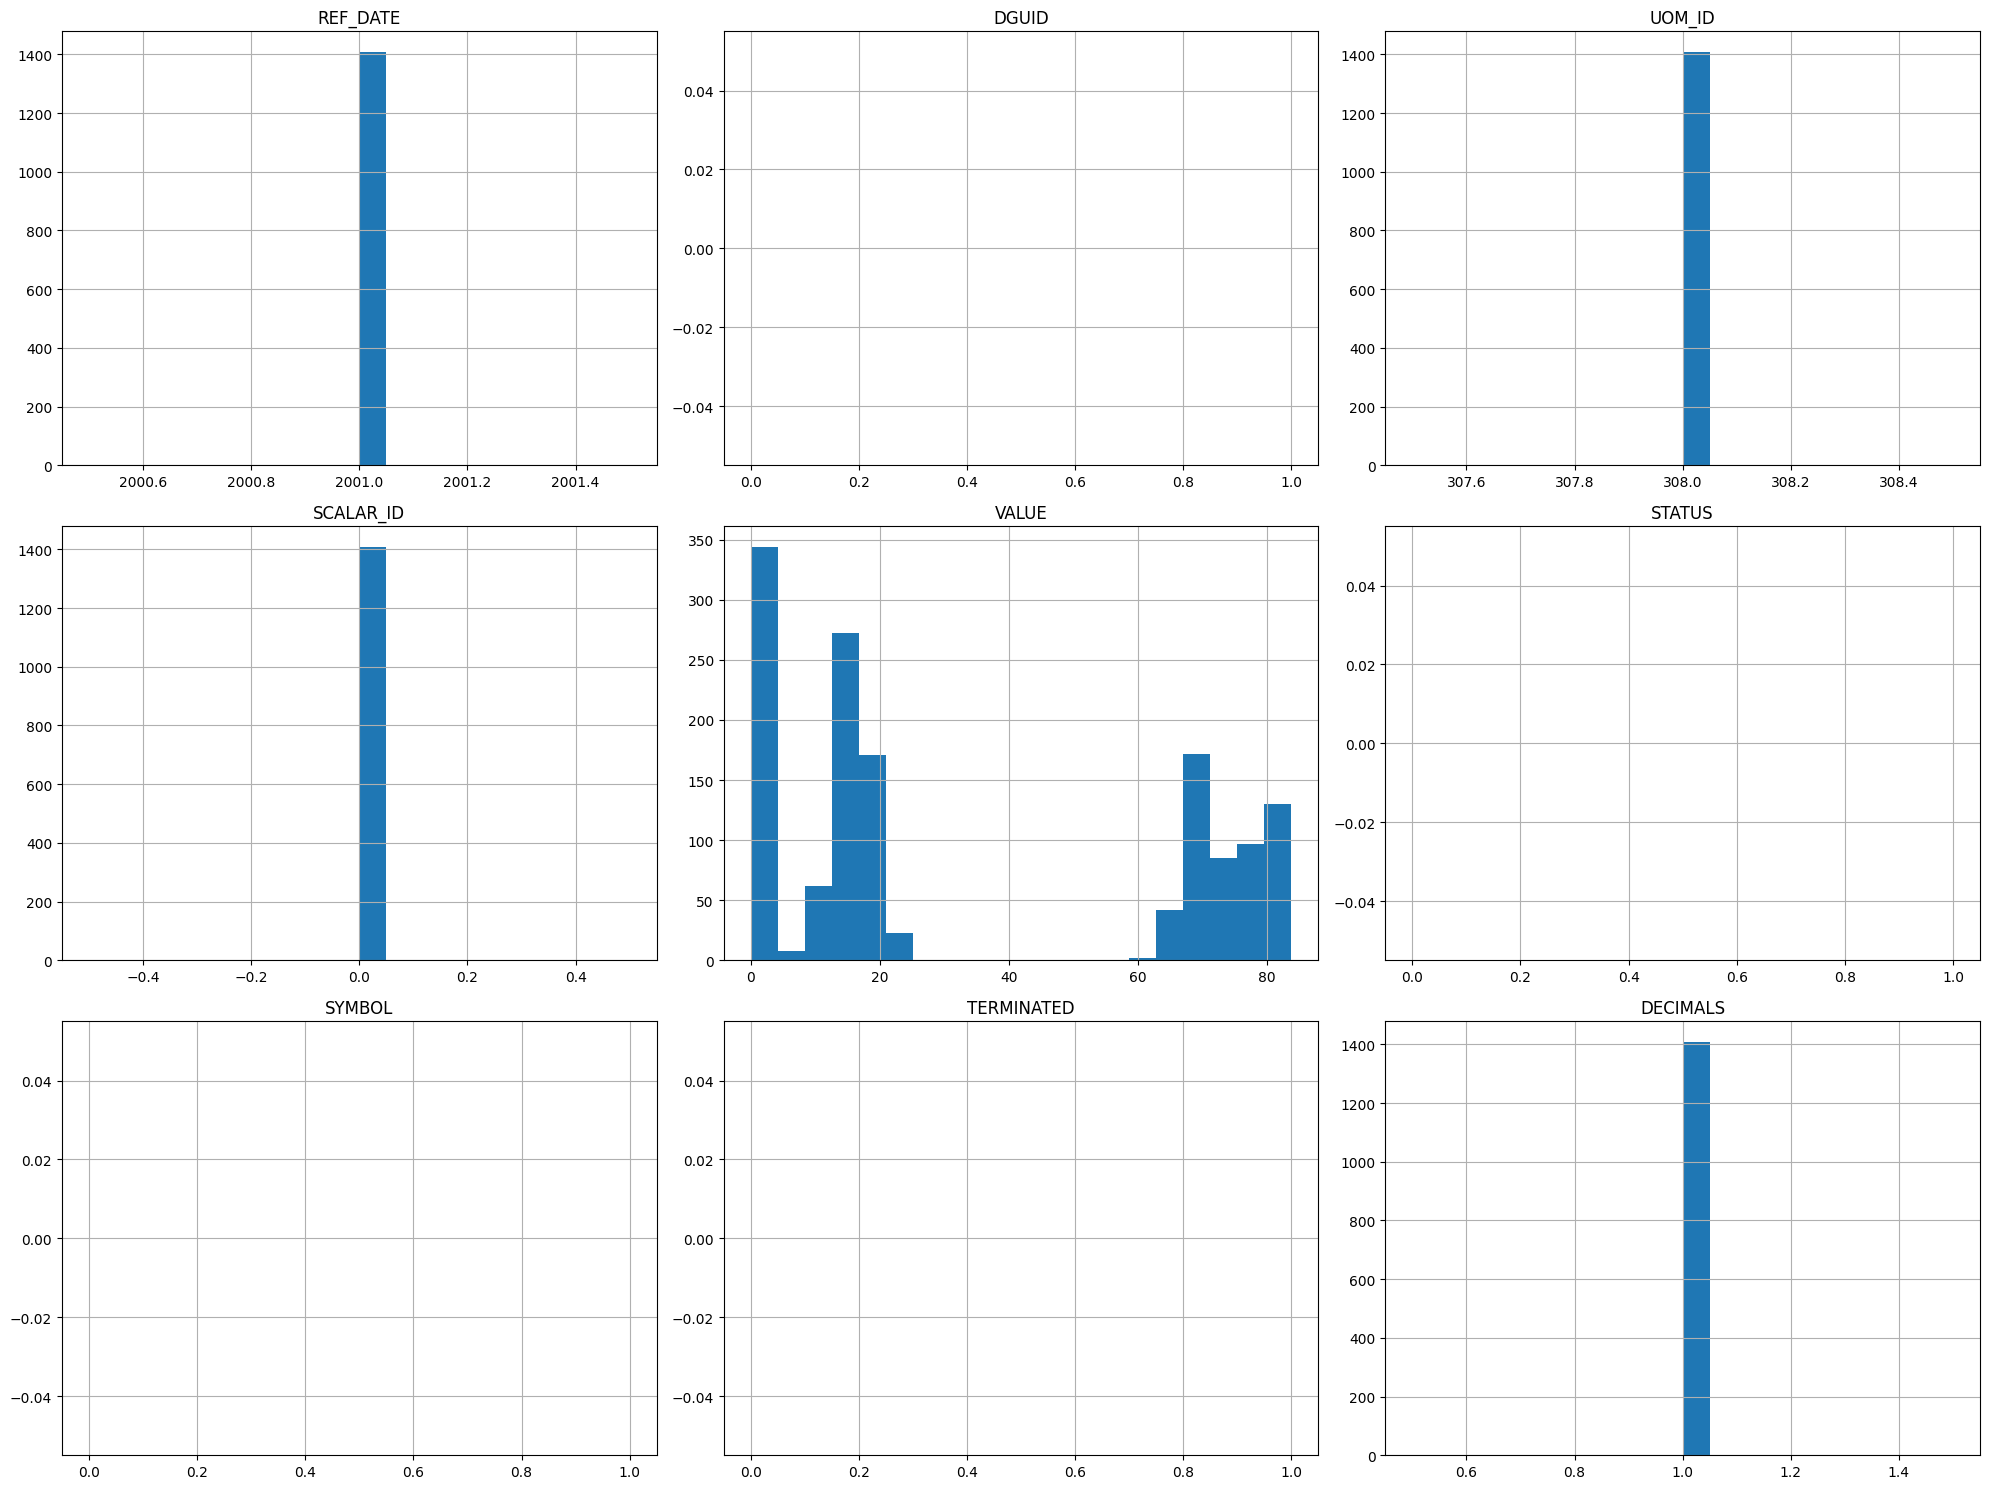

In [89]:
# Unique values in categorical columns
categorical_columns = canada_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(canada_df[col].unique())

# Distribution of numerical variables
numerical_columns = canada_df.select_dtypes(include=['float64', 'int64']).columns
canada_df[numerical_columns].hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

## Data Cleaning

In [90]:
# Drop columns with more than 30% missing values (e.g., suppose 'Country' column)
threshold = 0.3 * len(who_df)
who_df = who_df.dropna(thresh=len(who_df.columns) - 1, axis=1)  # Adjust threshold as needed

# Impute missing numerical values with mean
num_cols_who = who_df.select_dtypes(include=['float64', 'int64']).columns
who_df[num_cols_who] = who_df[num_cols_who].fillna(who_df[num_cols_who].mean())

# Impute categorical missing values with the mode (if any)
cat_cols_who = who_df.select_dtypes(include=['object']).columns
for col in cat_cols_who:
    who_df[col] = who_df[col].fillna(who_df[col].mode()[0])

# Similarly, for Canada dataset use simple imputation (mean for numeric, mode for categorical)
num_cols_canada = canada_df.select_dtypes(include=['float64', 'int64']).columns
canada_df[num_cols_canada] = canada_df[num_cols_canada].fillna(canada_df[num_cols_canada].mean())

cat_cols_canada = canada_df.select_dtypes(include=['object']).columns
for col in cat_cols_canada:
    canada_df[col] = canada_df[col].fillna(canada_df[col].mode()[0])

# Check cleaned data
print("Cleaned WHO dataset missing values:\n", who_df.isnull().sum())
print("Cleaned Canada dataset missing values:\n", canada_df.isnull().sum())

Cleaned WHO dataset missing values:
 Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64
Cleaned Canada dataset missing values:
 REF_DATE              0
GEO                   0
DGUID              1408
Age group             0
Sex                   0
Income group          0
Characteristics   

## EDA

### WHO Dataset

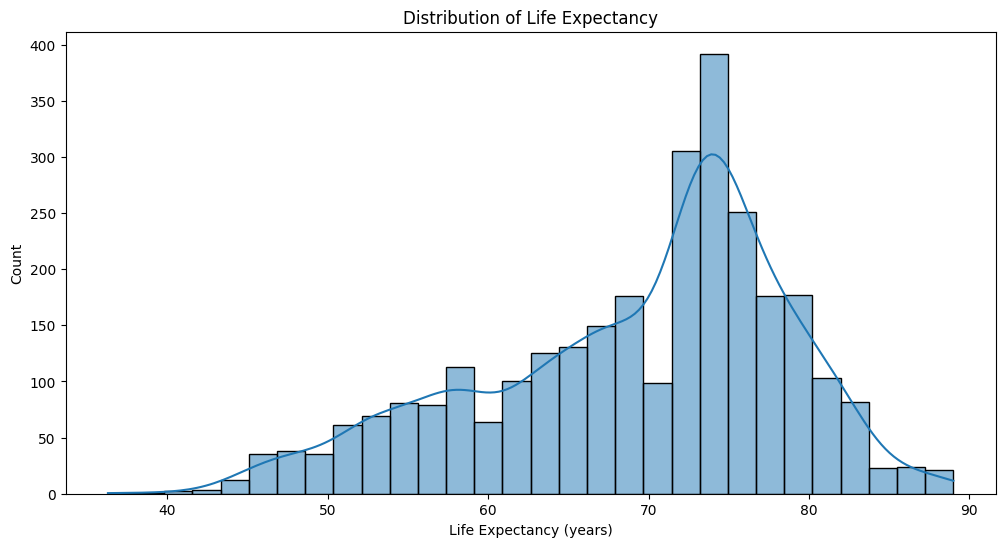

In [37]:
# Distribution of Life Expectancy

plt.figure(figsize=(12, 6))
sns.histplot(who_df['Lifeexpectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.show()

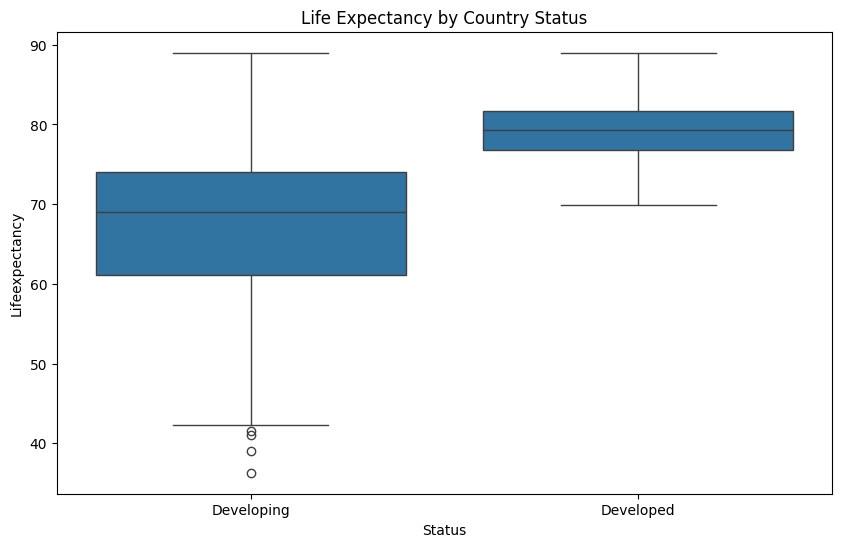

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Lifeexpectancy', data=who_df)
plt.title('Life Expectancy by Country Status')
plt.show()

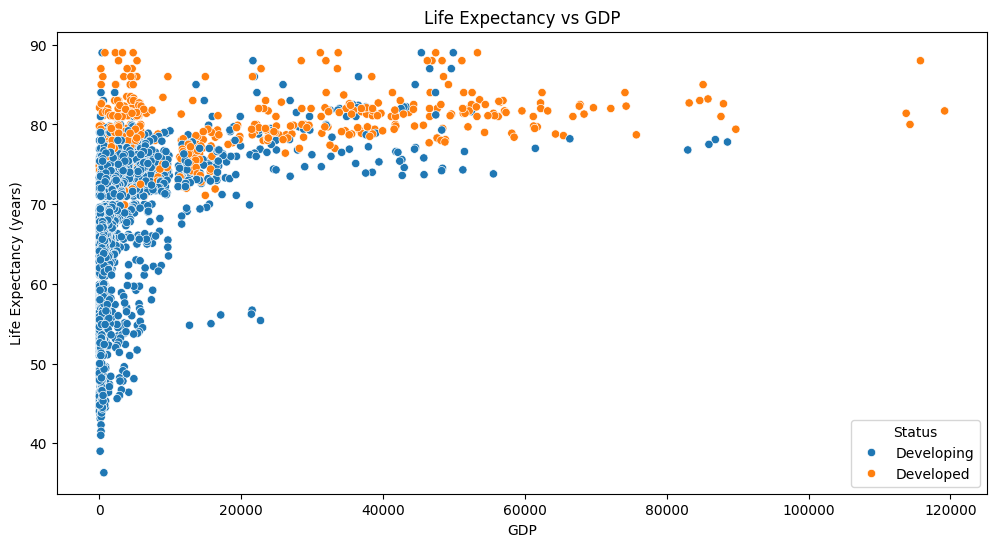

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GDP', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.show()


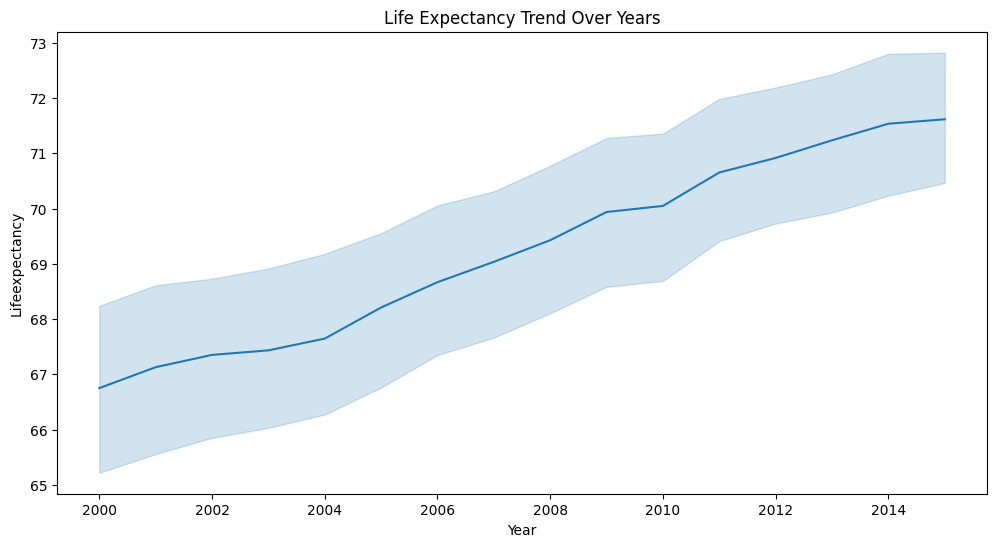

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Lifeexpectancy', data=who_df)
plt.title('Life Expectancy Trend Over Years')
plt.show()


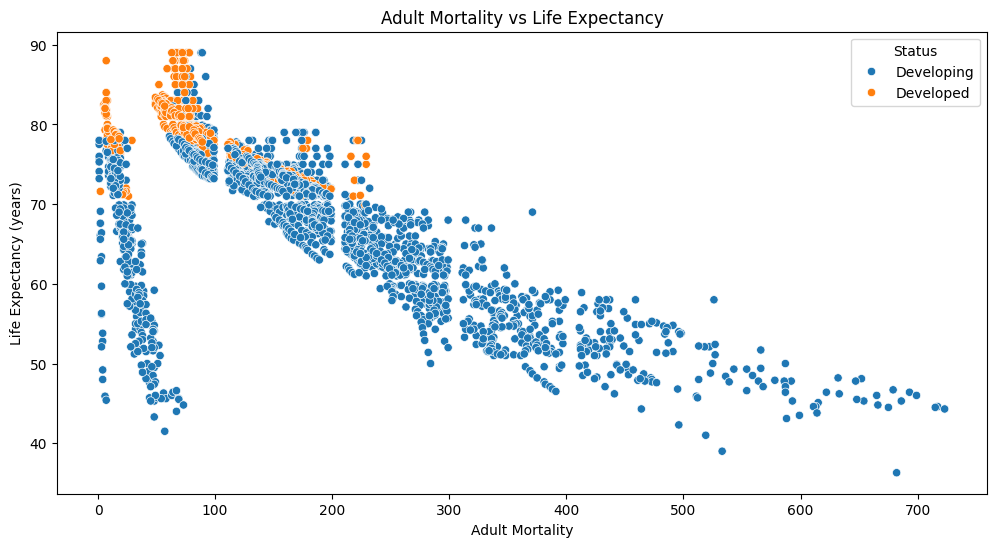

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AdultMortality', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('Adult Mortality vs Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy (years)')
plt.show()


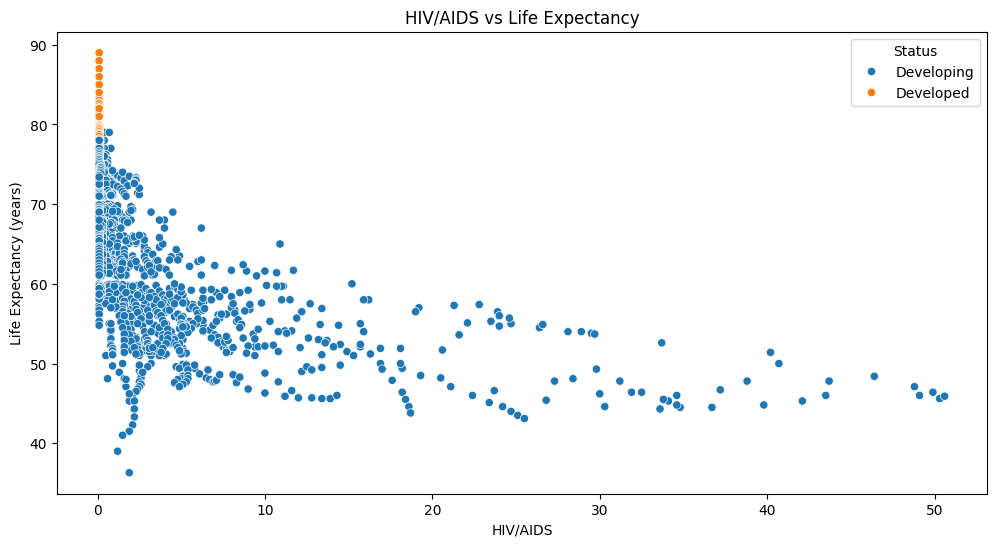

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='HIV/AIDS', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('HIV/AIDS vs Life Expectancy')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy (years)')
plt.show()


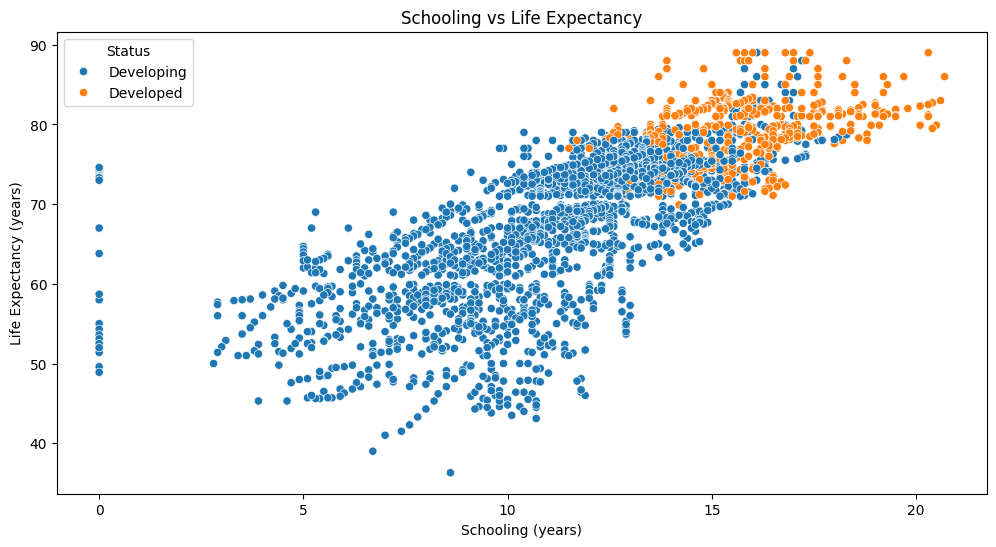

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Schooling', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')
plt.show()


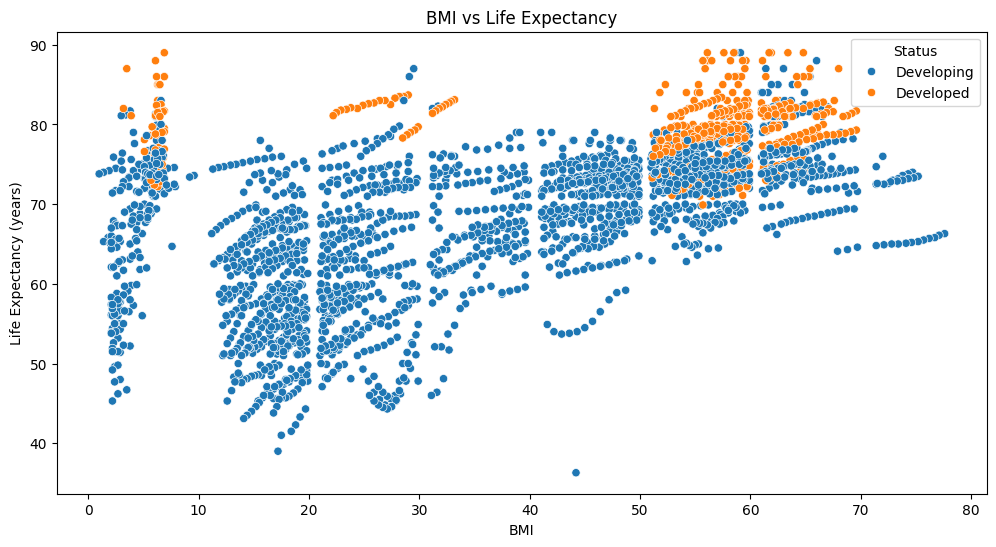

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BMI', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('BMI vs Life Expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy (years)')
plt.show()


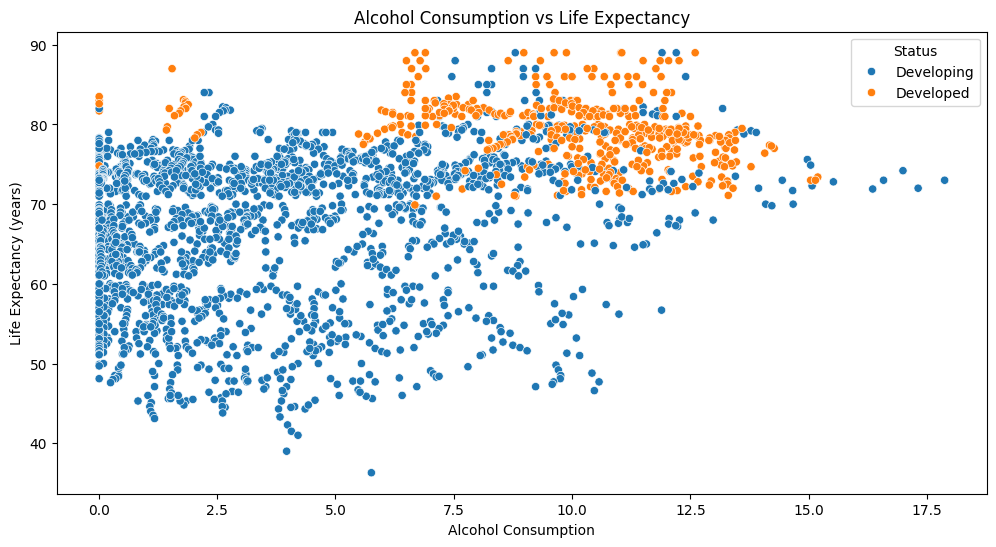

In [55]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Alcohol', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('Alcohol Consumption vs Life Expectancy')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy (years)')
plt.show()


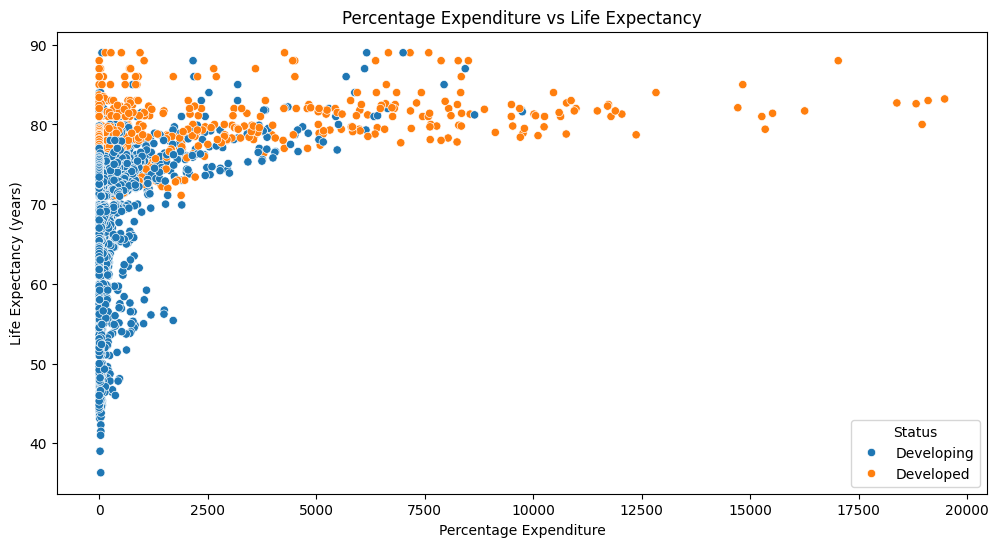

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='percentageexpenditure', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('Percentage Expenditure vs Life Expectancy')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy (years)')
plt.show()


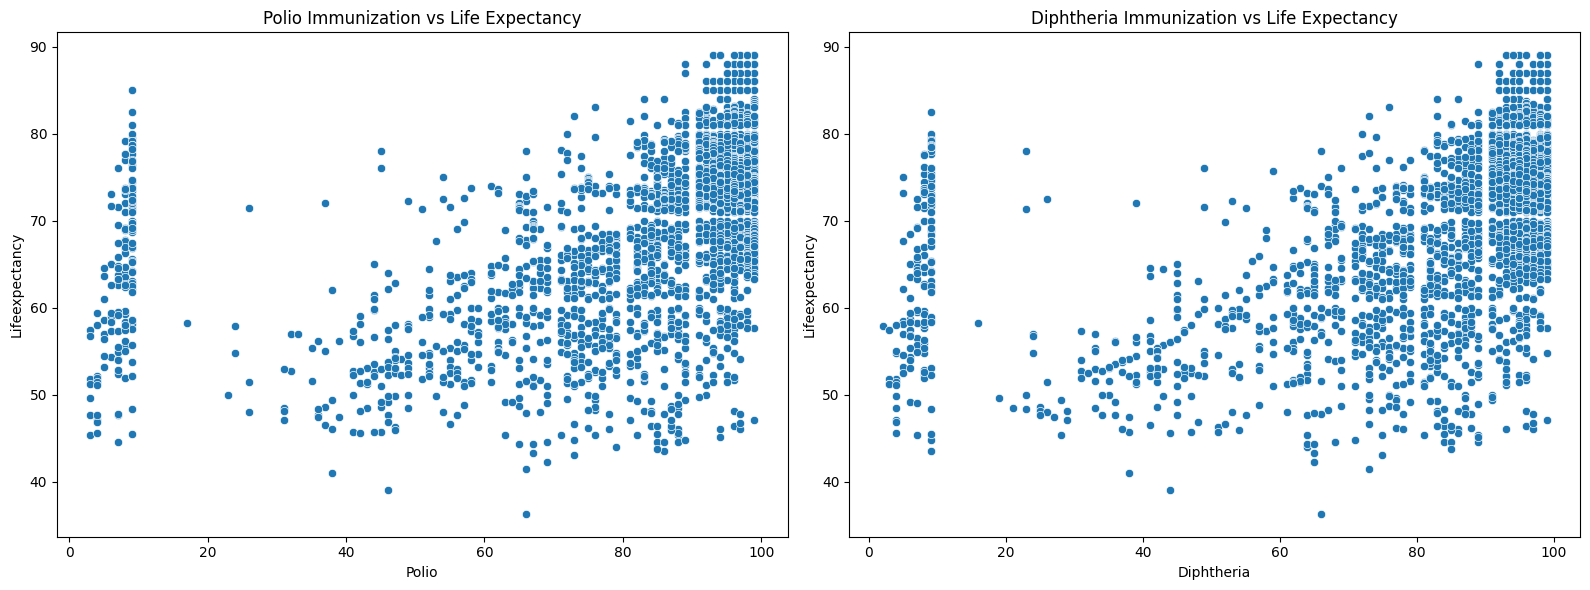

In [57]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Polio', y='Lifeexpectancy', data=who_df)
plt.title('Polio Immunization vs Life Expectancy')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Diphtheria', y='Lifeexpectancy', data=who_df)
plt.title('Diphtheria Immunization vs Life Expectancy')
plt.tight_layout()
plt.show()


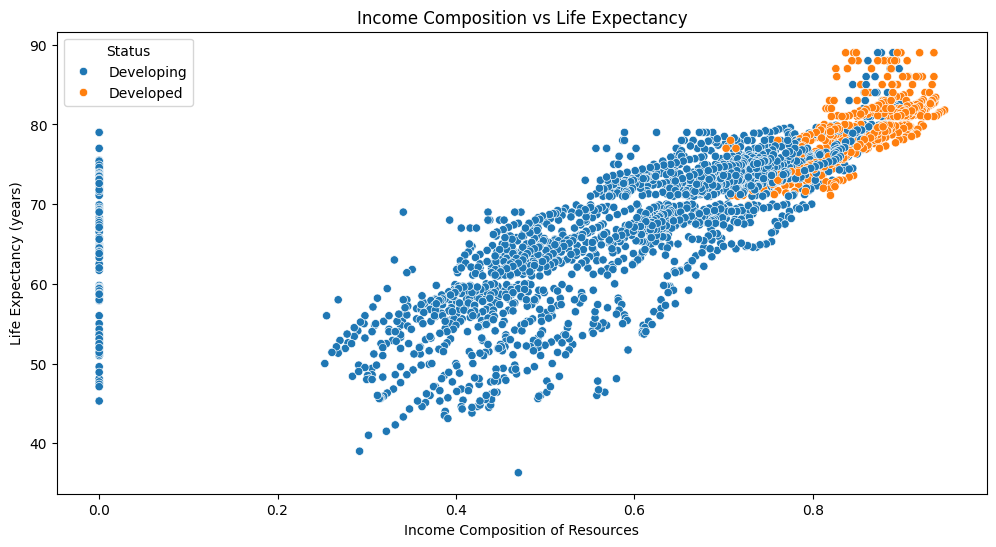

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Incomecompositionofresources', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('Income Composition vs Life Expectancy')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy (years)')
plt.show()


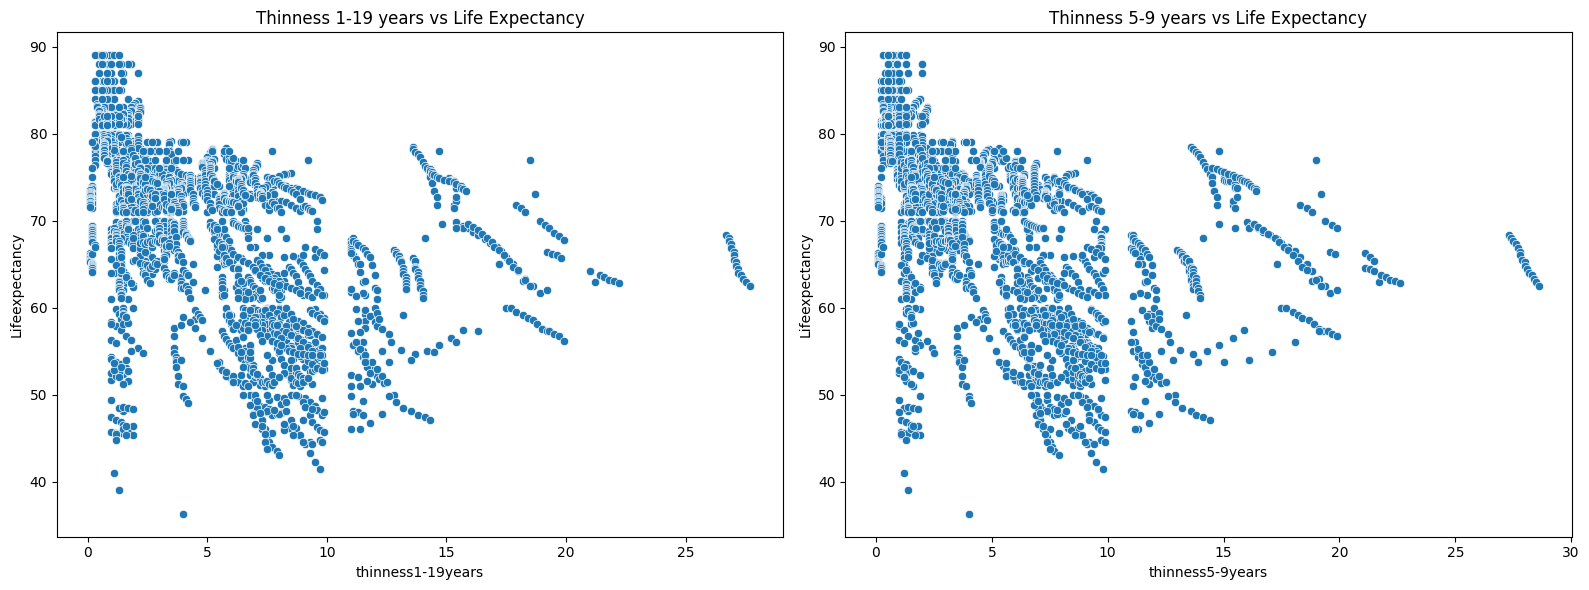

In [59]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='thinness1-19years', y='Lifeexpectancy', data=who_df)
plt.title('Thinness 1-19 years vs Life Expectancy')
plt.subplot(1, 2, 2)
sns.scatterplot(x='thinness5-9years', y='Lifeexpectancy', data=who_df)
plt.title('Thinness 5-9 years vs Life Expectancy')
plt.tight_layout()
plt.show()


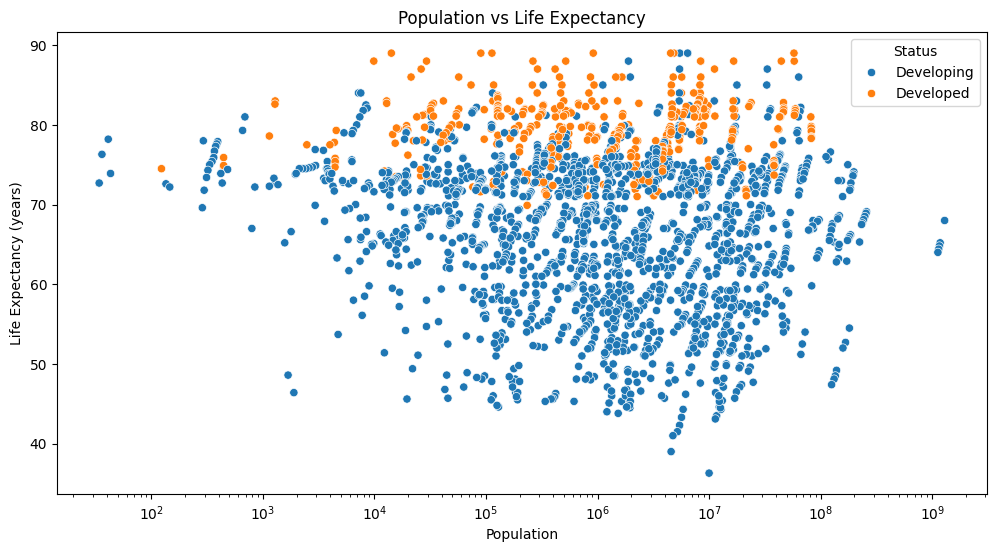

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Population', y='Lifeexpectancy', hue='Status', data=who_df)
plt.title('Population vs Life Expectancy')
plt.xlabel('Population')
plt.ylabel('Life Expectancy (years)')
plt.xscale('log')
plt.show()


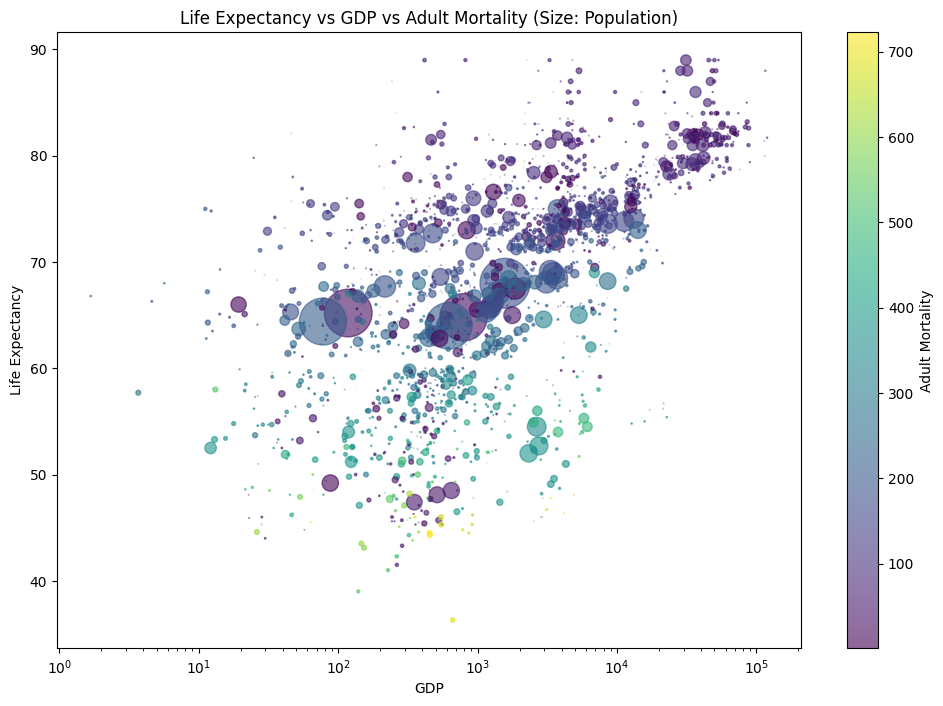

In [61]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(who_df['GDP'], who_df['Lifeexpectancy'],
                      c=who_df['AdultMortality'], s=who_df['Population']/1000000,
                      alpha=0.6, cmap='viridis')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs GDP vs Adult Mortality (Size: Population)')
plt.colorbar(scatter, label='Adult Mortality')
plt.xscale('log')
plt.show()


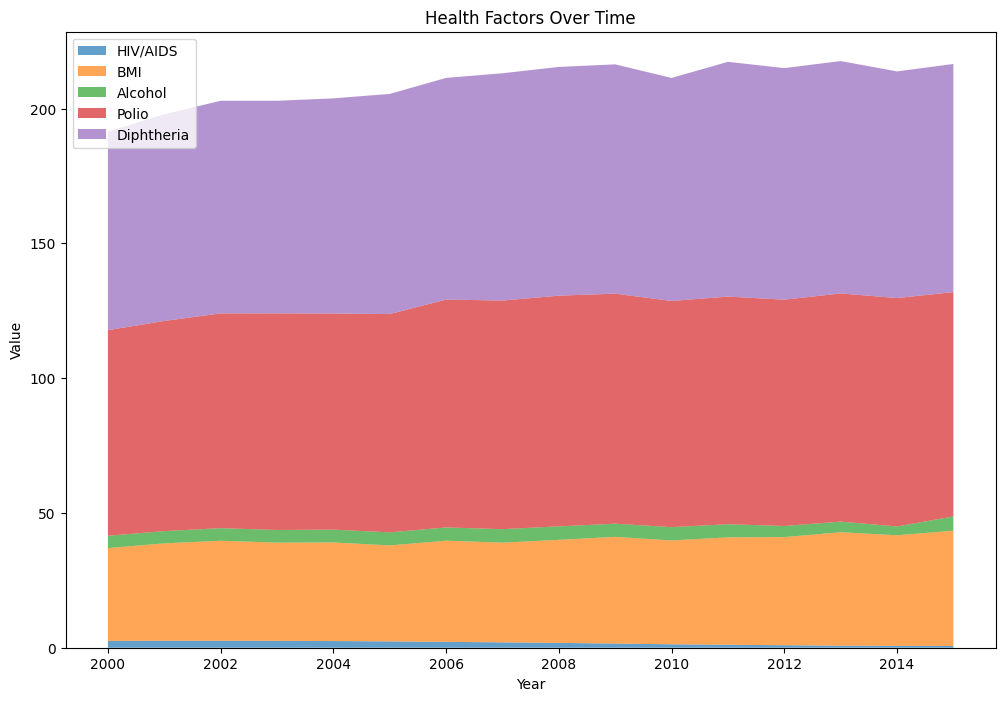

In [62]:
health_factors = ['HIV/AIDS', 'BMI', 'Alcohol', 'Polio', 'Diphtheria']
who_df_grouped = who_df.groupby('Year')[health_factors].mean()

plt.figure(figsize=(12, 8))
plt.stackplot(who_df_grouped.index, who_df_grouped[health_factors].T,
              labels=health_factors, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Health Factors Over Time')
plt.legend(loc='upper left')
plt.show()


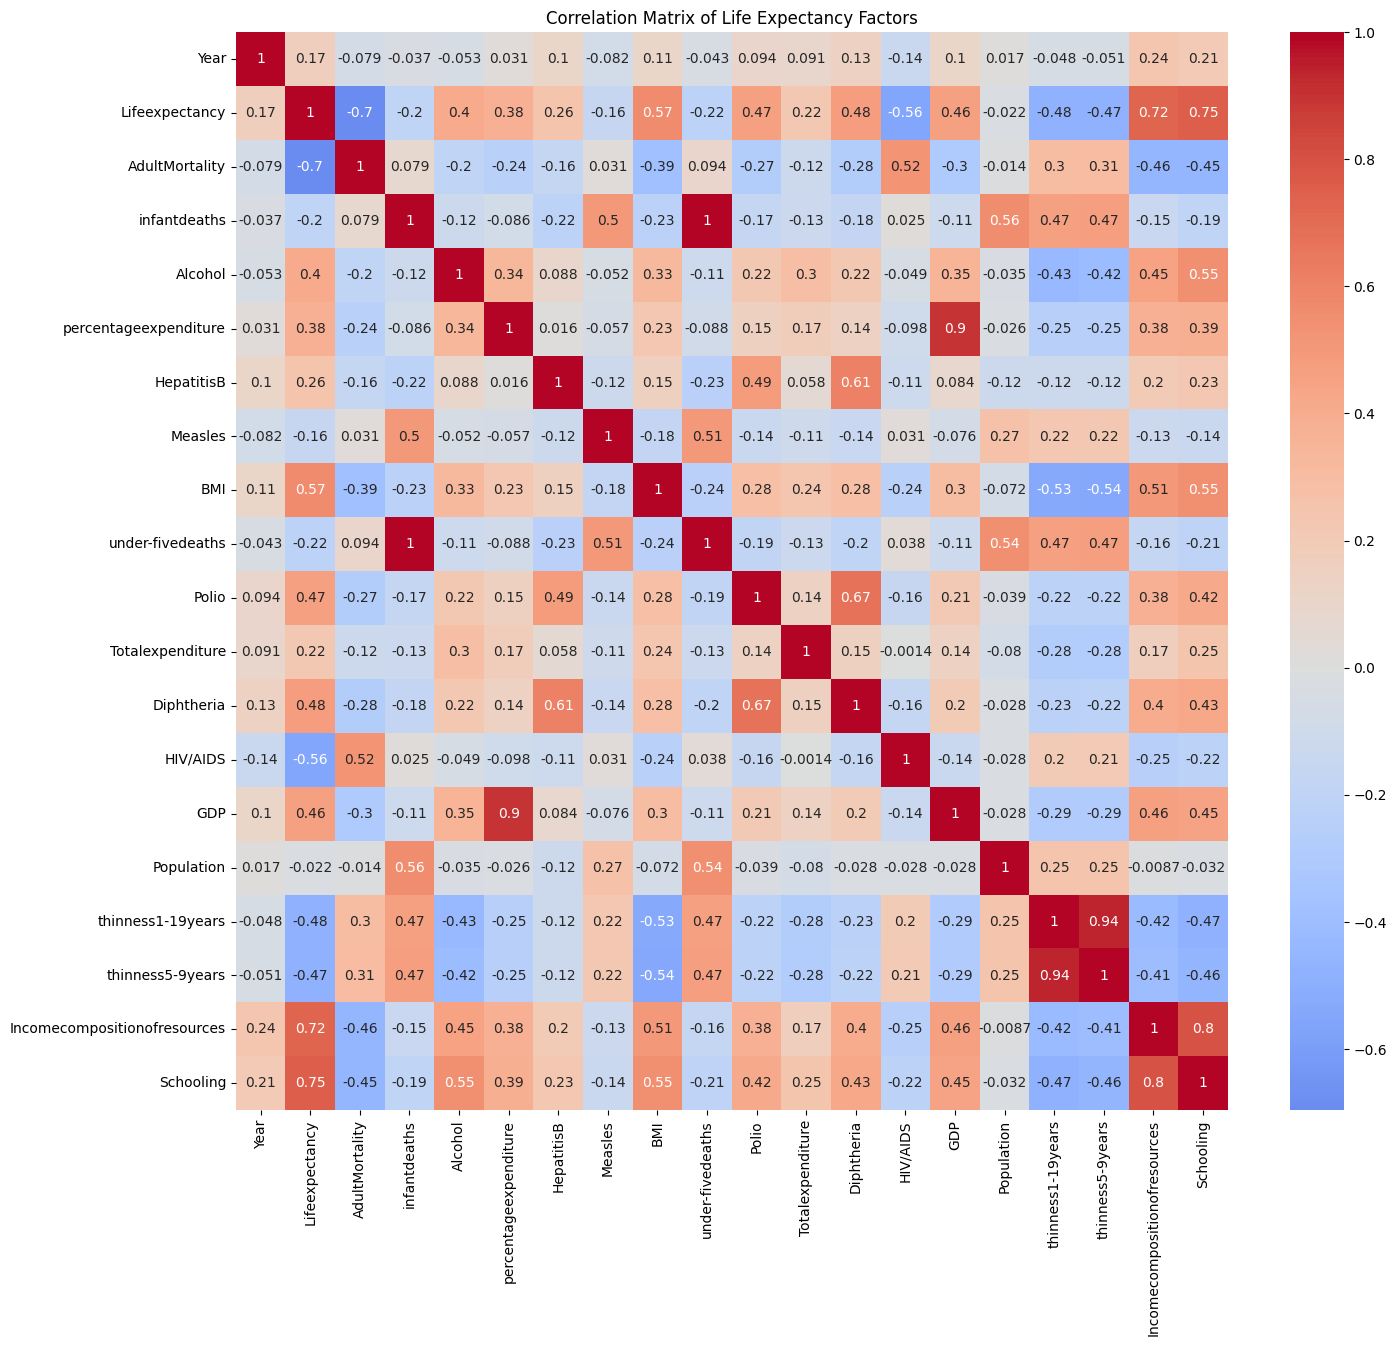

In [66]:
# Select only numeric columns
numeric_df = who_df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Life Expectancy Factors')
plt.show()


### Canada Dataset

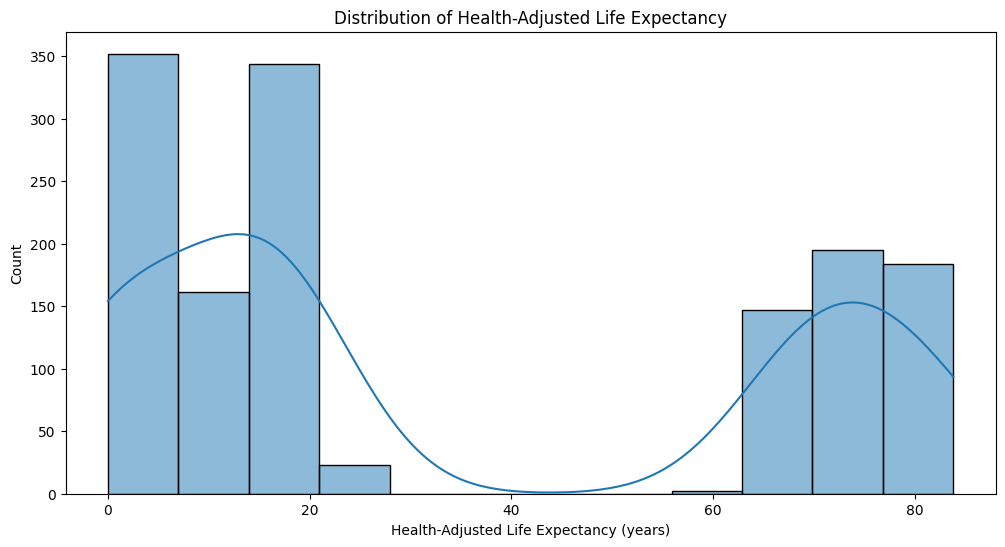

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(canada_df['VALUE'], kde=True)
plt.title('Distribution of Health-Adjusted Life Expectancy')
plt.xlabel('Health-Adjusted Life Expectancy (years)')
plt.show()


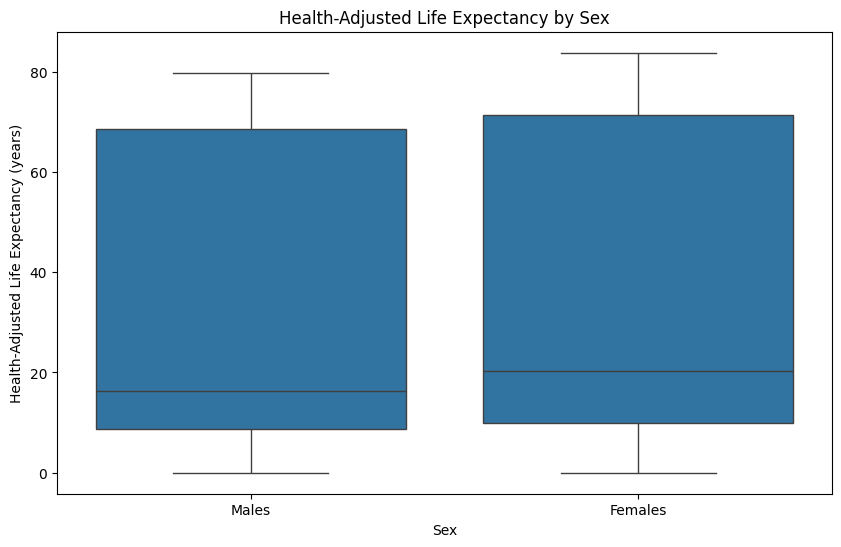

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='VALUE', data=canada_df)
plt.title('Health-Adjusted Life Expectancy by Sex')
plt.ylabel('Health-Adjusted Life Expectancy (years)')
plt.show()


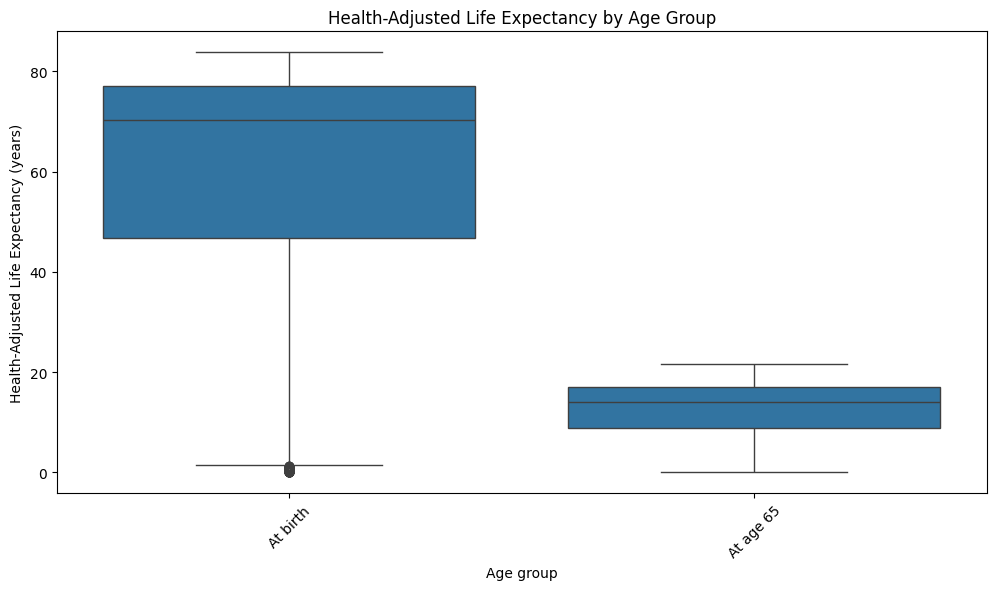

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age group', y='VALUE', data=canada_df)
plt.title('Health-Adjusted Life Expectancy by Age Group')
plt.ylabel('Health-Adjusted Life Expectancy (years)')
plt.xticks(rotation=45)
plt.show()


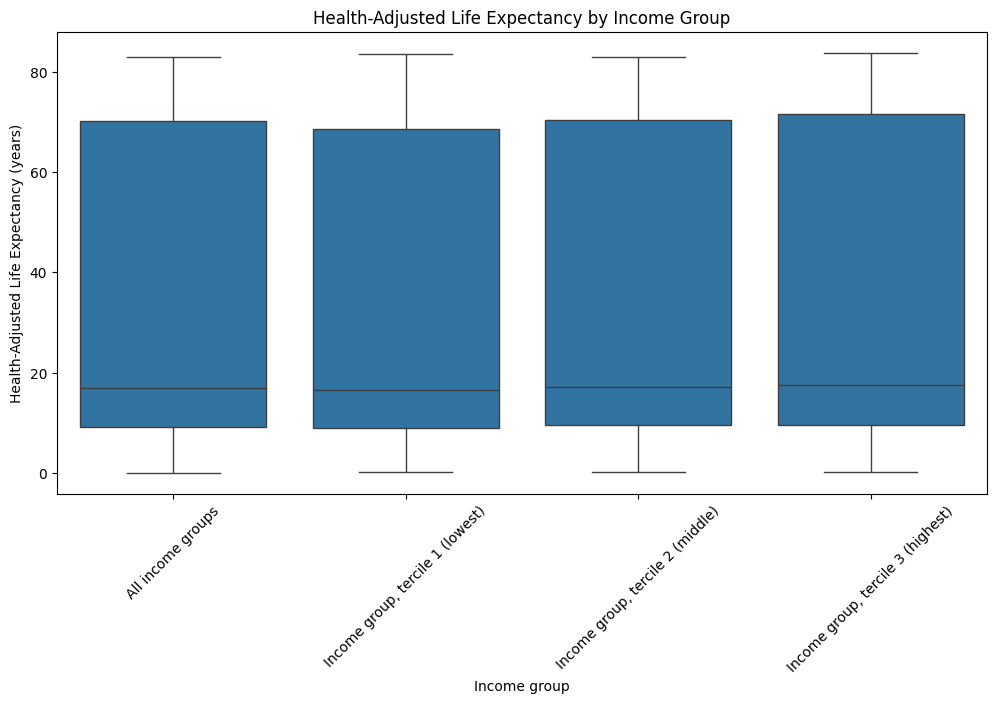

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income group', y='VALUE', data=canada_df)
plt.title('Health-Adjusted Life Expectancy by Income Group')
plt.ylabel('Health-Adjusted Life Expectancy (years)')
plt.xticks(rotation=45)
plt.show()


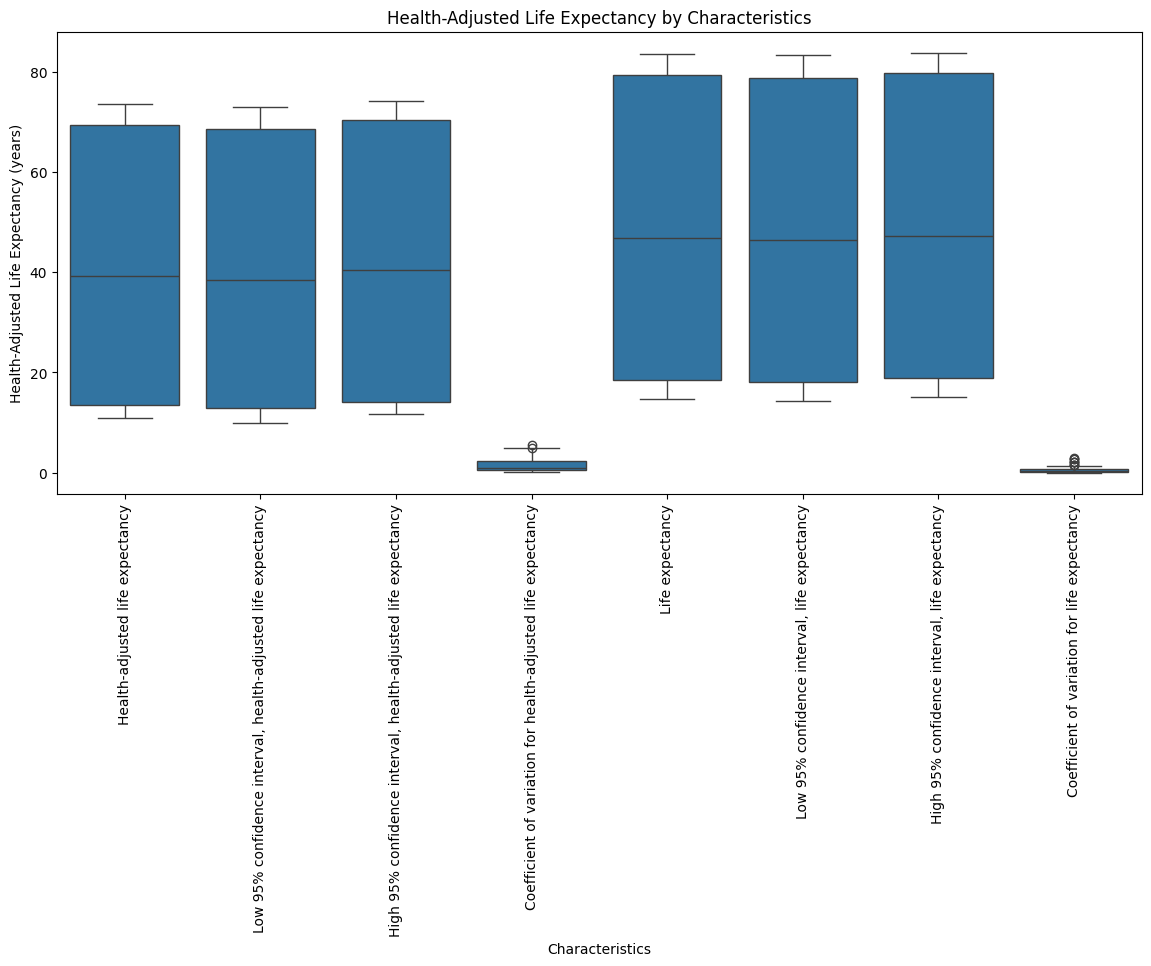

In [46]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Characteristics', y='VALUE', data=canada_df)
plt.title('Health-Adjusted Life Expectancy by Characteristics')
plt.ylabel('Health-Adjusted Life Expectancy (years)')
plt.xticks(rotation=90)
plt.show()


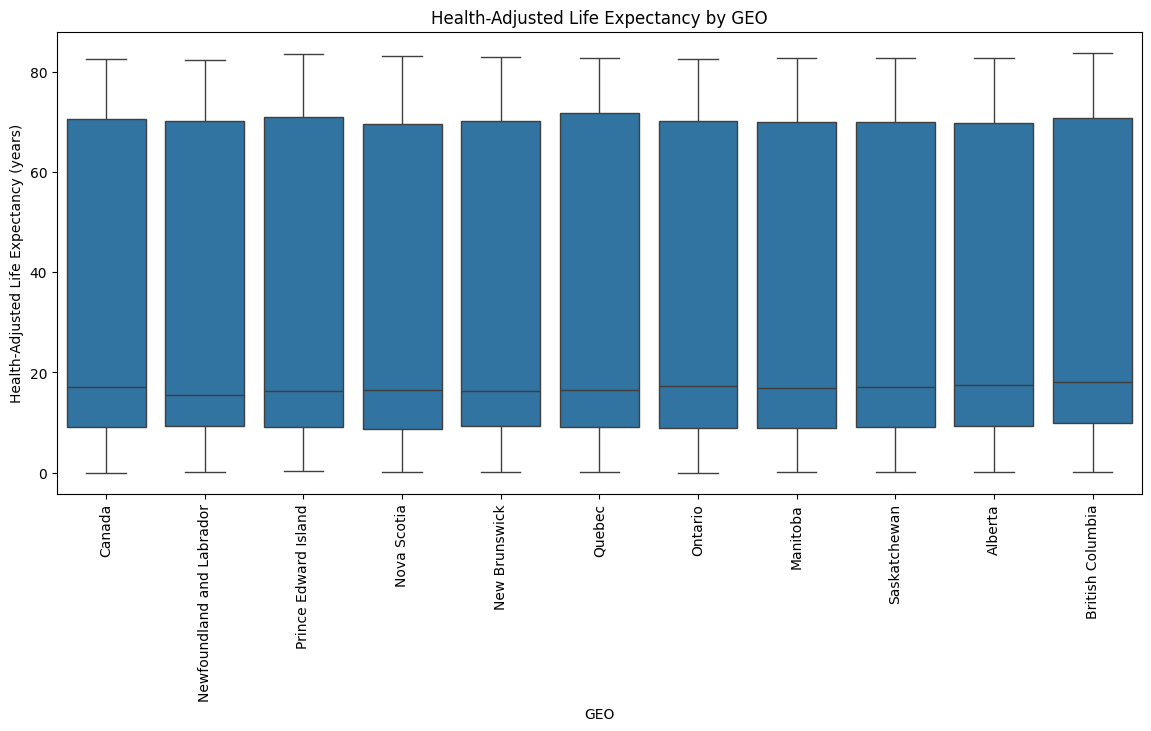

In [47]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='GEO', y='VALUE', data=canada_df)
plt.title('Health-Adjusted Life Expectancy by GEO')
plt.ylabel('Health-Adjusted Life Expectancy (years)')
plt.xticks(rotation=90)
plt.show()


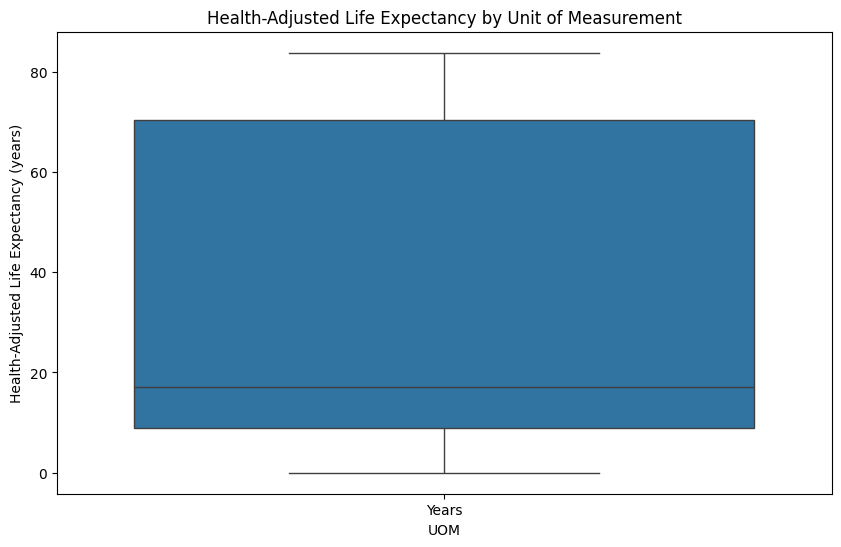

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='UOM', y='VALUE', data=canada_df)
plt.title('Health-Adjusted Life Expectancy by Unit of Measurement')
plt.ylabel('Health-Adjusted Life Expectancy (years)')
plt.show()


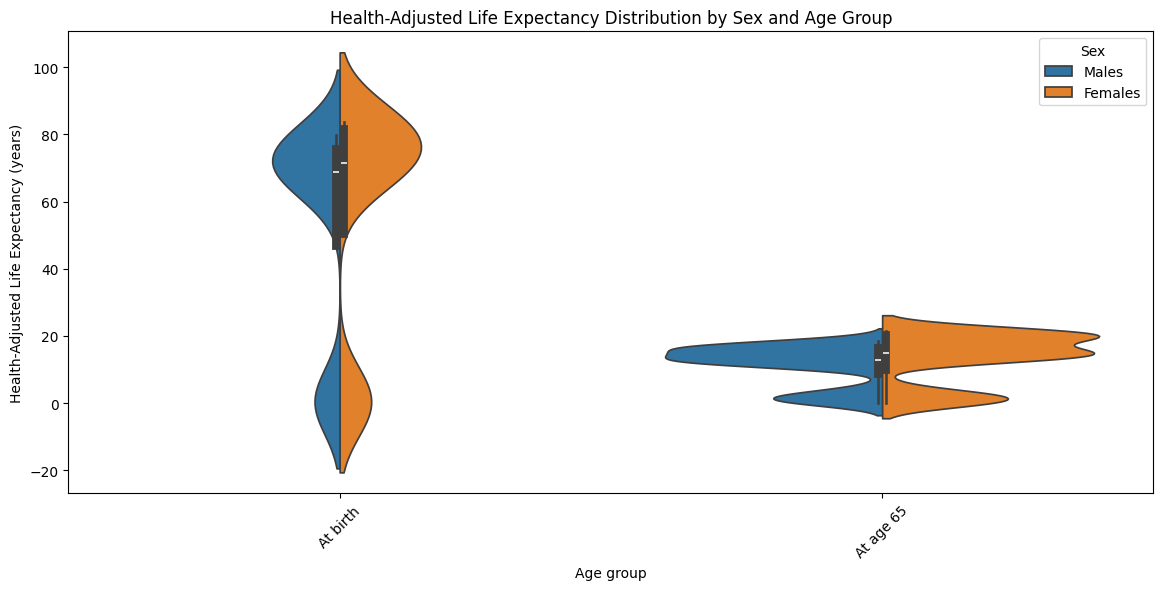

In [69]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='Age group', y='VALUE', hue='Sex', data=canada_df, split=True)
plt.title('Health-Adjusted Life Expectancy Distribution by Sex and Age Group')
plt.ylabel('Health-Adjusted Life Expectancy (years)')
plt.xticks(rotation=45)
plt.show()


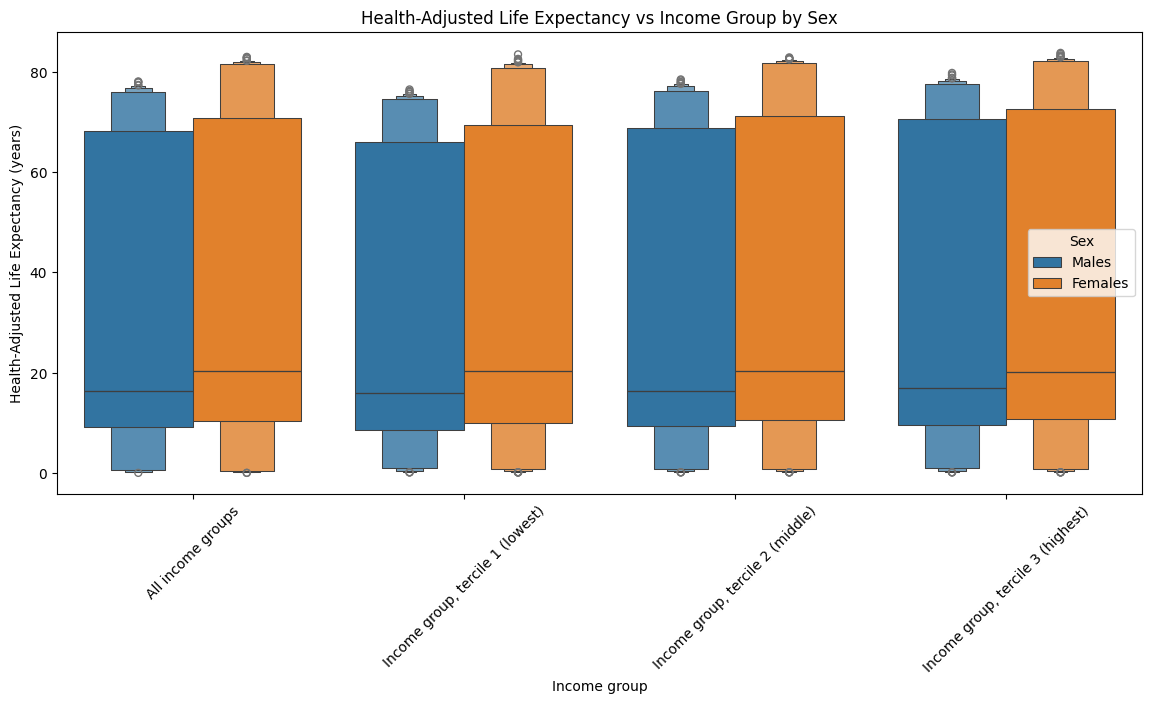

In [71]:
plt.figure(figsize=(14, 6))
sns.boxenplot(x='Income group', y='VALUE', hue='Sex', data=canada_df)
plt.title('Health-Adjusted Life Expectancy vs Income Group by Sex')
plt.ylabel('Health-Adjusted Life Expectancy (years)')
plt.xticks(rotation=45)
plt.show()


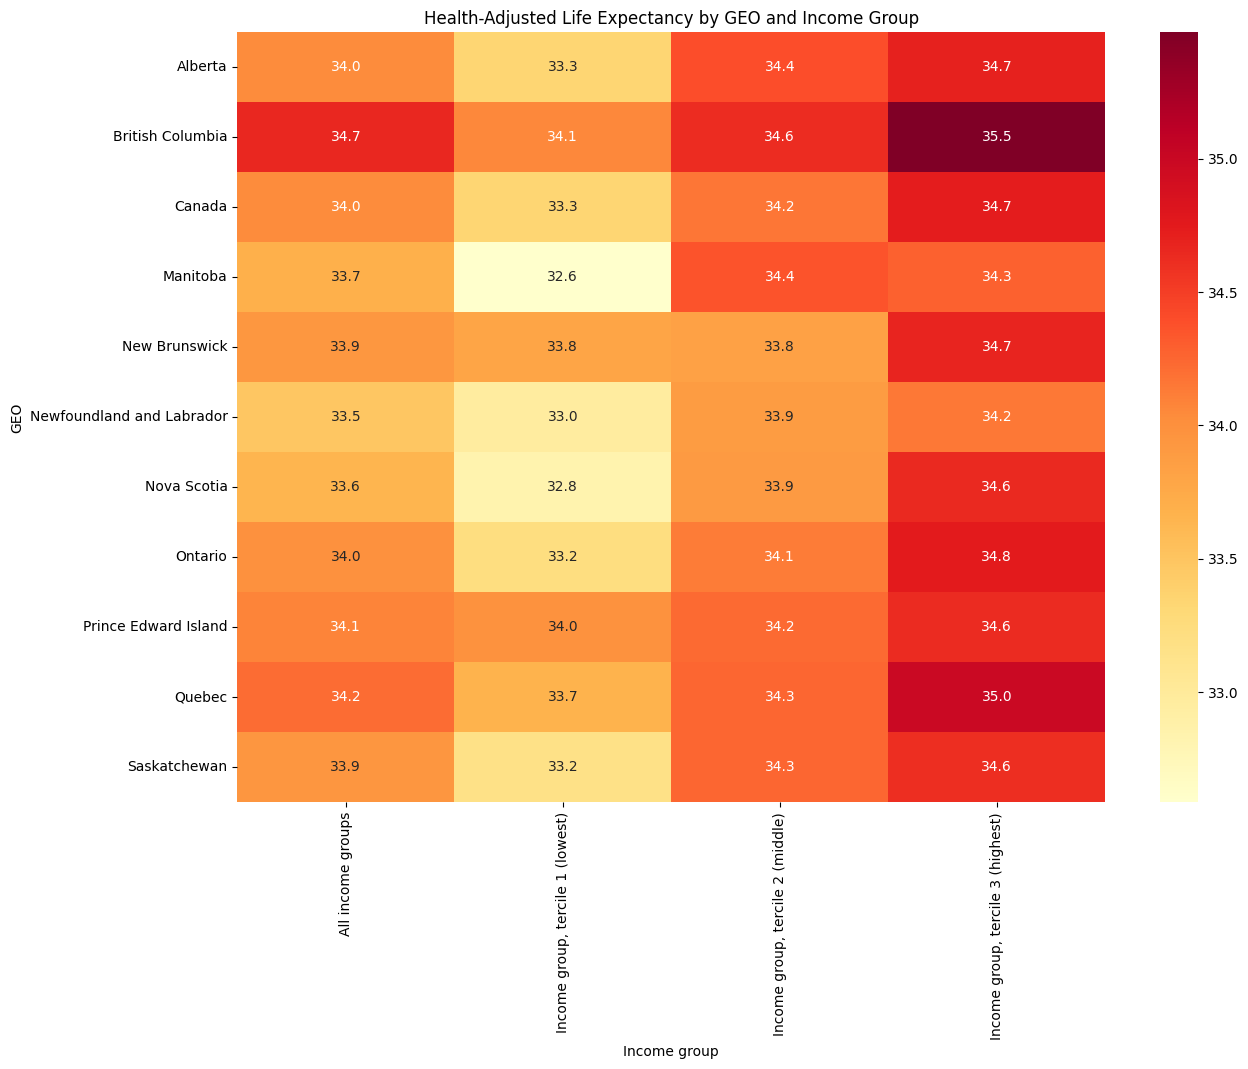

In [75]:
pivot_data = canada_df.pivot_table(values='VALUE', index='GEO', columns='Income group', aggfunc='mean')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Health-Adjusted Life Expectancy by GEO and Income Group')
plt.show()


## Feature Engineering

In [103]:
# WHO Dataset

who_numeric = [
    'Year', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure',
    'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
    'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
    'thinness5-9years', 'Incomecompositionofresources', 'Schooling'
]
# Categorical features
who_categorical = ['Country', 'Status']

# Canada Dataset
canada_numeric = ['REF_DATE']
if 'DECIMALS' in canada_df.columns and canada_df['DECIMALS'].dtype in [np.int64, np.float64]:
    canada_numeric.append('DECIMALS')
# Categorical features: expanded selection
canada_categorical = ['GEO', 'Age group', 'Sex', 'Income group', 'Characteristics',
                      'STATUS', 'VECTOR', 'COORDINATE', 'UOM', 'SCALAR_ID', 'UOM_ID', 'TERMINATED']


# Define preprocessing pipelines for numeric and categorical features
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer for WHO dataset
who_preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, who_numeric),
    ('cat', categorical_pipeline, who_categorical)
])

# ColumnTransformer for Canada dataset
canada_preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, canada_numeric),
    ('cat', categorical_pipeline, canada_categorical)
])


## Model Training & Hyperparameter tuning

In [106]:
def train_and_tune_model(df, target, preprocessor):
    # Split into features and target
    X = df.drop(columns=[target])
    y = df[target]

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Define Pipelines for each model

    # 1. Linear Regression
    # We'll tune the 'fit_intercept' parameter.
    pipe_lr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    param_grid_lr = {
        'model__fit_intercept': [True, False]
    }

    # 2. Random Forest
    pipe_rf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
    param_grid_rf = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }

    # 3. XGBoost
    pipe_xgb = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
    param_grid_xgb = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 6, 10],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__subsample': [0.7, 1.0]
    }

    # GridSearchCV for each model

    grids = {}
    best_models = {}
    scores = {}

    for name, pipe, params in [
        ('Linear Regression', pipe_lr, param_grid_lr),
        ('Random Forest', pipe_rf, param_grid_rf),
        ('XGBoost', pipe_xgb, param_grid_xgb)
    ]:
        print(f"Training {name} with hyperparameter tuning...")
        grid = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_

        # Predict on test set
        y_pred = grid.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        scores[name] = {
            'RMSE': np.sqrt(mse),
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred)
        }
        print(f"Best Params for {name}: {grid.best_params_}")
        print(f"Performance: {scores[name]}\n")
        grids[name] = grid

    return best_models, scores, X_test, y_test

In [107]:
# Train models on WHO dataset
who_best_models, who_scores, who_X_test, who_y_test = train_and_tune_model(who_df, 'Lifeexpectancy', who_preprocessor)


Training Linear Regression with hyperparameter tuning...
Best Params for Linear Regression: {'model__fit_intercept': True}
Performance: {'RMSE': np.float64(1.7490308754801434), 'R2': 0.9646897994375649, 'MAE': 1.1552915860618627}

Training Random Forest with hyperparameter tuning...
Best Params for Random Forest: {'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Performance: {'RMSE': np.float64(1.6164350639157672), 'R2': 0.9698406652679284, 'MAE': 1.0278808509689354}

Training XGBoost with hyperparameter tuning...
Best Params for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__subsample': 0.7}
Performance: {'RMSE': np.float64(1.5415684471089), 'R2': 0.9725696810588896, 'MAE': 0.9857816812943442}



In [108]:
# Train models on Canada dataset
canada_best_models, canada_scores, canada_X_test, canada_y_test = train_and_tune_model(canada_df, 'VALUE', canada_preprocessor)

Training Linear Regression with hyperparameter tuning...


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['STATUS' 'TERMINATED']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['STATUS' 'TERMINATED']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Best Params for Linear Regression: {'model__fit_intercept': True}
Performance: {'RMSE': np.float64(13.348598075343185), 'R2': 0.8069749234744261, 'MAE': 11.52641457155093}

Training Random Forest with hyperparameter tuning...


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['STATUS' 'TERMINATED']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['STATUS' 'TERMINATED']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Best Params for Random Forest: {'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Performance: {'RMSE': np.float64(0.6230933731215583), 'R2': 0.9995794199341954, 'MAE': 0.42130926009977}

Training XGBoost with hyperparameter tuning...


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['STATUS' 'TERMINATED']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Best Params for XGBoost: {'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.7}
Performance: {'RMSE': np.float64(0.45651609013732836), 'R2': 0.9997742360484037, 'MAE': 0.3186288102747913}



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['STATUS' 'TERMINATED']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


## Model Evalution

In [109]:
def print_scores(scores, dataset_name):
    print(f"--- Performance Metrics for {dataset_name} ---")
    for model_name, metrics in scores.items():
        print(f"{model_name}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")
        print()

In [110]:
print_scores(who_scores, "WHO Dataset")


--- Performance Metrics for WHO Dataset ---
Linear Regression:
  RMSE: 1.7490
  R2: 0.9647
  MAE: 1.1553

Random Forest:
  RMSE: 1.6164
  R2: 0.9698
  MAE: 1.0279

XGBoost:
  RMSE: 1.5416
  R2: 0.9726
  MAE: 0.9858



In [111]:
print_scores(canada_scores, "Canada Dataset")

--- Performance Metrics for Canada Dataset ---
Linear Regression:
  RMSE: 13.3486
  R2: 0.8070
  MAE: 11.5264

Random Forest:
  RMSE: 0.6231
  R2: 0.9996
  MAE: 0.4213

XGBoost:
  RMSE: 0.4565
  R2: 0.9998
  MAE: 0.3186



## Feature Importance

In [116]:
def get_feature_names(column_transformer):
    feature_names = []
    # Use the fitted transformers_ if available; otherwise, fallback to the original transformers.
    transformers = column_transformer.transformers_ if hasattr(column_transformer, 'transformers_') else column_transformer.transformers

    for name, transformer, cols in transformers:
        if name == 'remainder' or transformer == 'drop' or transformer is None:
            continue
        # If the transformer is a pipeline with named_steps
        if hasattr(transformer, 'named_steps'):
            if 'onehot' in transformer.named_steps:
                try:
                    names = list(transformer.named_steps['onehot'].get_feature_names_out(cols))
                except Exception as e:
                    # In case the transformer isn't fitted, fallback to original column names
                    names = cols
                feature_names.extend(names)
            else:
                feature_names.extend(cols)
        elif hasattr(transformer, 'get_feature_names_out'):
            try:
                names = list(transformer.get_feature_names_out(cols))
            except Exception as e:
                names = cols
            feature_names.extend(names)
        else:
            feature_names.extend(cols)
    return feature_names


WHO Feature Names: ['num__Year', 'num__AdultMortality', 'num__infantdeaths', 'num__Alcohol', 'num__percentageexpenditure', 'num__HepatitisB', 'num__Measles', 'num__BMI', 'num__under-fivedeaths', 'num__Polio', 'num__Totalexpenditure', 'num__Diphtheria', 'num__HIV/AIDS', 'num__GDP', 'num__Population', 'num__thinness1-19years', 'num__thinness5-9years', 'num__Incomecompositionofresources', 'num__Schooling', 'cat__Country_Afghanistan', 'cat__Country_Albania', 'cat__Country_Algeria', 'cat__Country_Angola', 'cat__Country_AntiguaandBarbuda', 'cat__Country_Argentina', 'cat__Country_Armenia', 'cat__Country_Australia', 'cat__Country_Austria', 'cat__Country_Azerbaijan', 'cat__Country_Bahamas', 'cat__Country_Bahrain', 'cat__Country_Bangladesh', 'cat__Country_Barbados', 'cat__Country_Belarus', 'cat__Country_Belgium', 'cat__Country_Belize', 'cat__Country_Benin', 'cat__Country_Bhutan', 'cat__Country_Bolivia(PlurinationalStateof)', 'cat__Country_BosniaandHerzegovina', 'cat__Country_Botswana', 'cat__Cou

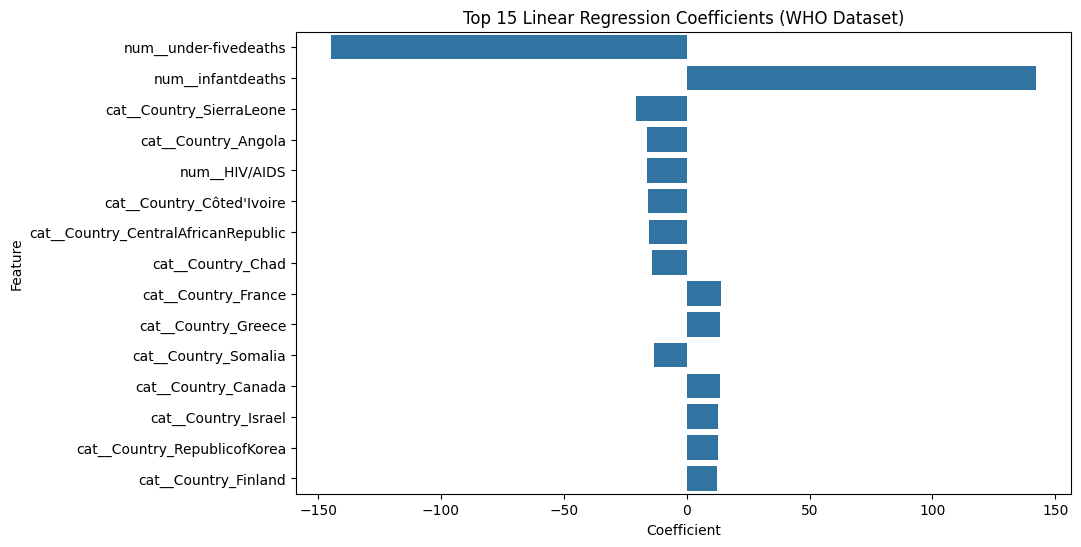


Model: Random Forest


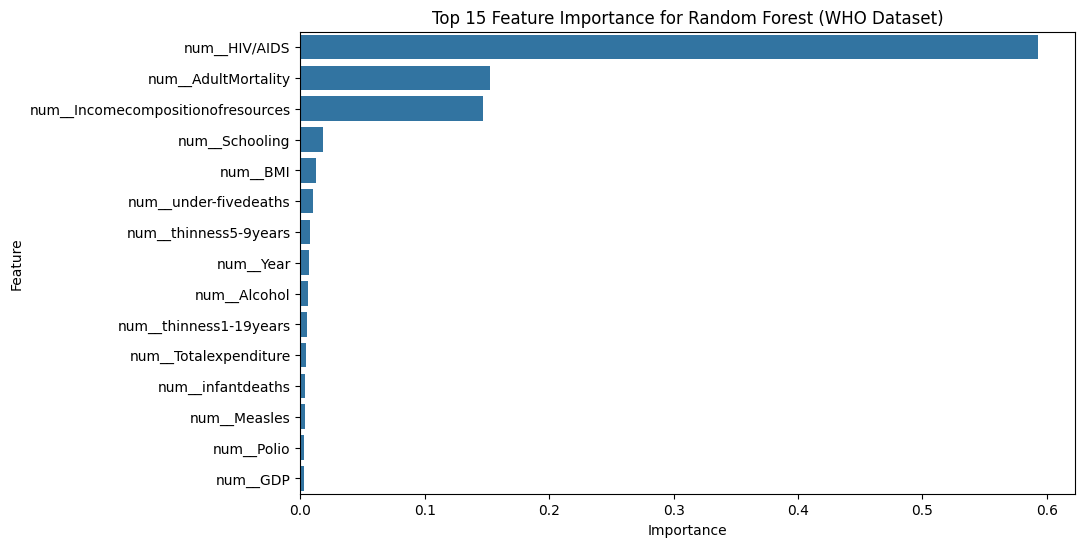


Model: XGBoost


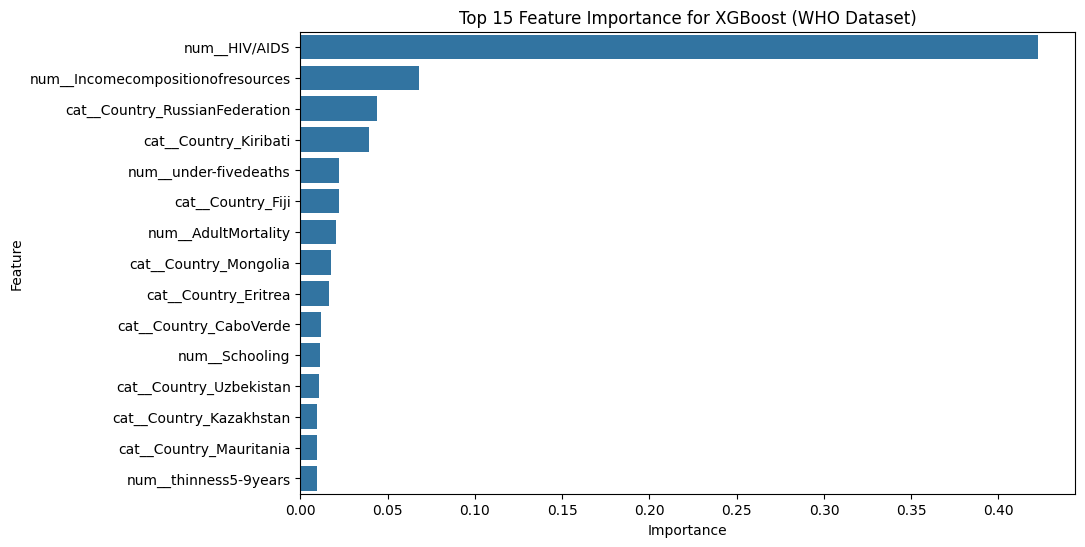

In [119]:
# Attempt to extract feature names using the built-in method from the fitted preprocessor
try:
    who_feature_names = list(who_best_models['Linear Regression'].named_steps['preprocessor'].get_feature_names_out())
except AttributeError:
    # Fallback to custom method if the built-in method is unavailable
    who_feature_names = get_feature_names(who_preprocessor)

print("WHO Feature Names:", who_feature_names)

print("\nTop 15 Feature Importance / Coefficients for WHO Dataset:")
for model_name, model_pipeline in who_best_models.items():
    print(f"\nModel: {model_name}")
    model = model_pipeline.named_steps['model']

    # For tree-based models, use feature_importances_
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        fi_df = pd.DataFrame({'Feature': who_feature_names, 'Importance': importances})
        fi_df = fi_df.sort_values('Importance', ascending=False).head(15)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=fi_df)
        plt.title(f'Top 15 Feature Importance for {model_name} (WHO Dataset)')
        plt.show()

    # For Linear Regression, plot the coefficients
    elif model_name == 'Linear Regression':
        coef = model.coef_
        if len(coef) != len(who_feature_names):
            print("Mismatch in number of coefficients and feature names. Coefficients length:",
                  len(coef), "Feature names length:", len(who_feature_names))
        else:
            lr_df = pd.DataFrame({'Feature': who_feature_names, 'Coefficient': coef})
            lr_df['AbsCoeff'] = lr_df['Coefficient'].abs()
            lr_df = lr_df.sort_values('AbsCoeff', ascending=False).head(15)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Coefficient', y='Feature', data=lr_df)
            plt.title('Top 15 Linear Regression Coefficients (WHO Dataset)')
            plt.show()
    else:
        print(f"No feature importance method available for {model_name}")


Transformed Canada Feature Names: ['num__REF_DATE', 'num__DECIMALS', 'cat__GEO_Alberta', 'cat__GEO_British Columbia', 'cat__GEO_Canada', 'cat__GEO_Manitoba', 'cat__GEO_New Brunswick', 'cat__GEO_Newfoundland and Labrador', 'cat__GEO_Nova Scotia', 'cat__GEO_Ontario', 'cat__GEO_Prince Edward Island', 'cat__GEO_Quebec', 'cat__GEO_Saskatchewan', 'cat__Age group_At age 65', 'cat__Age group_At birth', 'cat__Sex_Females', 'cat__Sex_Males', 'cat__Income group_All income groups', 'cat__Income group_Income group, tercile 1 (lowest)', 'cat__Income group_Income group, tercile 2 (middle)', 'cat__Income group_Income group, tercile 3 (highest)', 'cat__Characteristics_Coefficient of variation for health-adjusted life expectancy', 'cat__Characteristics_Coefficient of variation for life expectancy', 'cat__Characteristics_Health-adjusted life expectancy', 'cat__Characteristics_High 95% confidence interval, health-adjusted life expectancy', 'cat__Characteristics_High 95% confidence interval, life expectanc

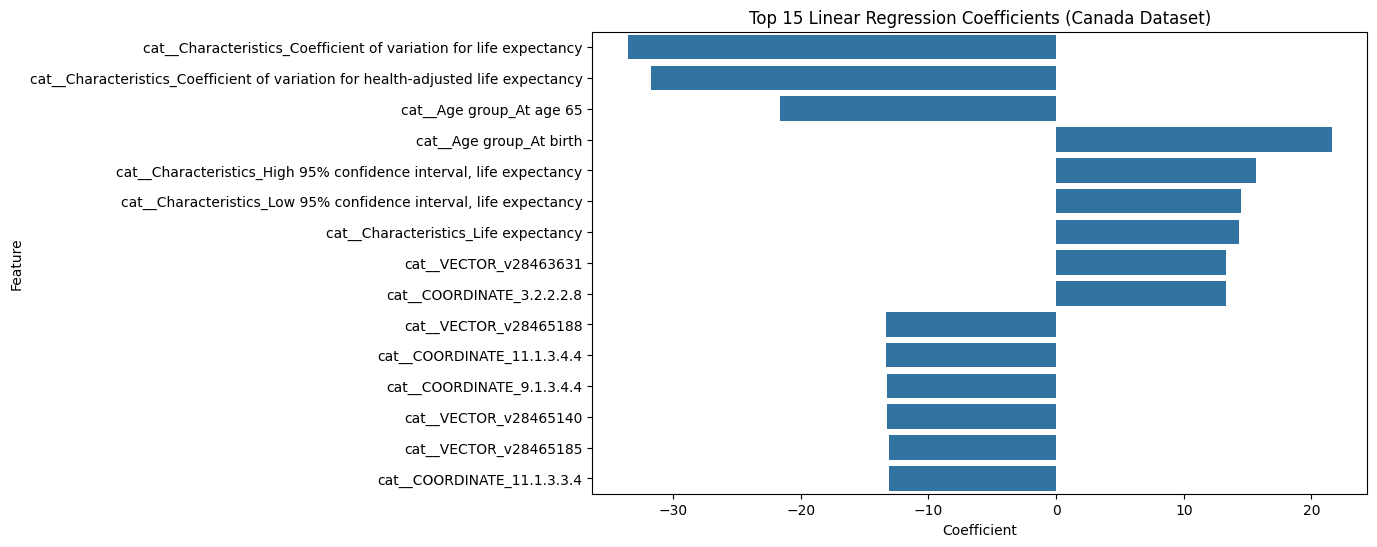


Model: Random Forest


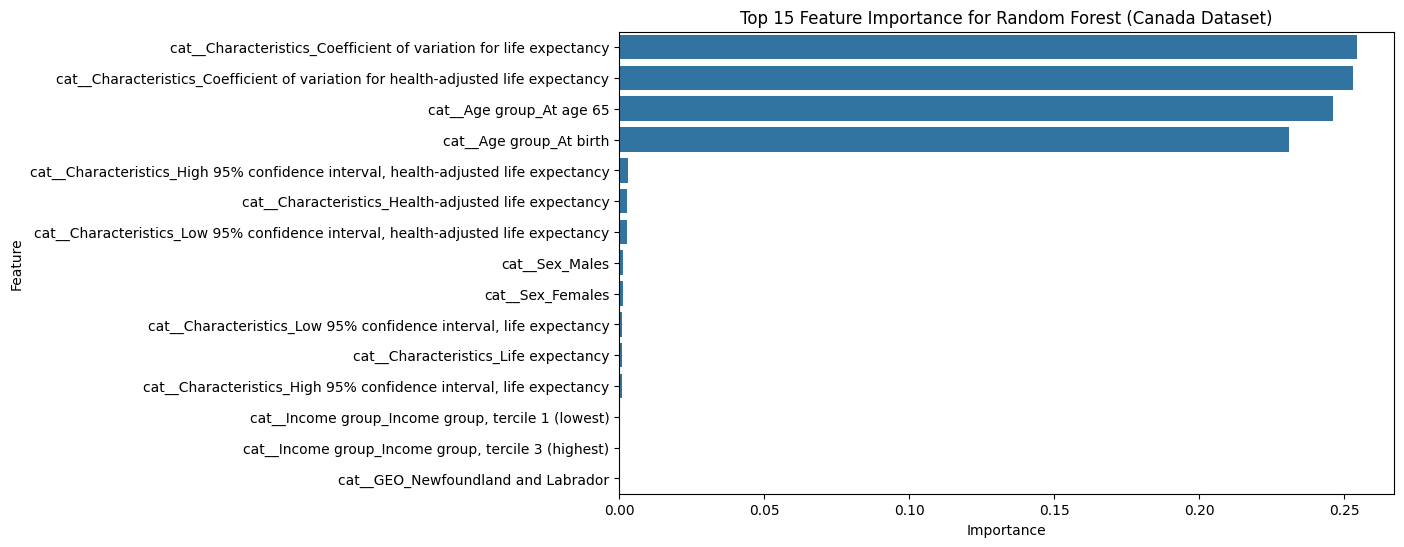


Model: XGBoost


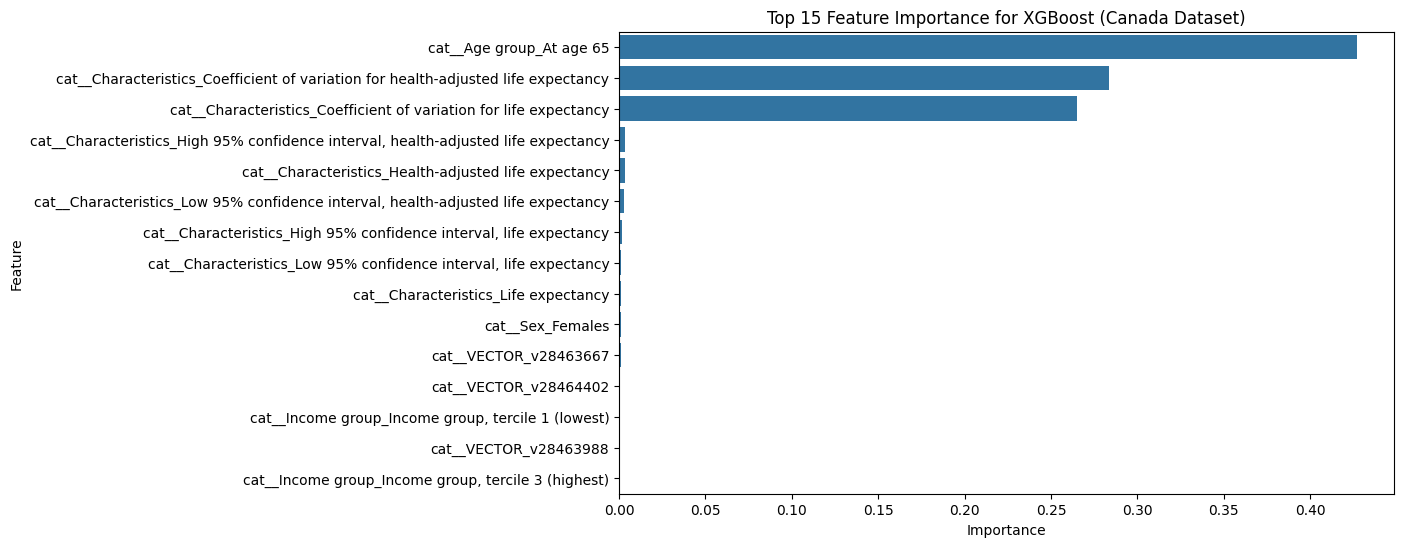

In [121]:
# Attempt to extract transformed feature names from the fitted preprocessor in the Linear Regression pipeline
try:
    canada_feature_names_transformed = list(canada_best_models['Linear Regression'].named_steps['preprocessor'].get_feature_names_out())
except Exception as e:
    print("Built-in get_feature_names_out failed, falling back to custom method. Error:", e)
    canada_feature_names_transformed = get_feature_names(canada_preprocessor)

print("Transformed Canada Feature Names:", canada_feature_names_transformed)

print("\nTop 15 Feature Importance / Coefficients for Canada Dataset:")
for model_name, model_pipeline in canada_best_models.items():
    print(f"\nModel: {model_name}")
    model = model_pipeline.named_steps['model']

    # Use the transformed feature names for all models
    feature_names = canada_feature_names_transformed

    # For tree-based models, use feature_importances_
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        if len(importances) != len(feature_names):
            print("Mismatch in number of feature importances and feature names. Importances length:",
                  len(importances), "Feature names length:", len(feature_names))
        else:
            fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            fi_df = fi_df.sort_values('Importance', ascending=False).head(15)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=fi_df)
            plt.title(f'Top 15 Feature Importance for {model_name} (Canada Dataset)')
            plt.show()

    # For Linear Regression, plot the coefficients
    elif model_name == 'Linear Regression':
        coef = model.coef_
        if len(coef) != len(feature_names):
            print("Mismatch in number of coefficients and feature names. Coefficients length:",
                  len(coef), "Feature names length:", len(feature_names))
        else:
            lr_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
            lr_df['AbsCoeff'] = lr_df['Coefficient'].abs()
            lr_df = lr_df.sort_values('AbsCoeff', ascending=False).head(15)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Coefficient', y='Feature', data=lr_df)
            plt.title('Top 15 Linear Regression Coefficients (Canada Dataset)')
            plt.show()
    else:
        print(f"No feature importance method available for {model_name}")


## Modal Comparison

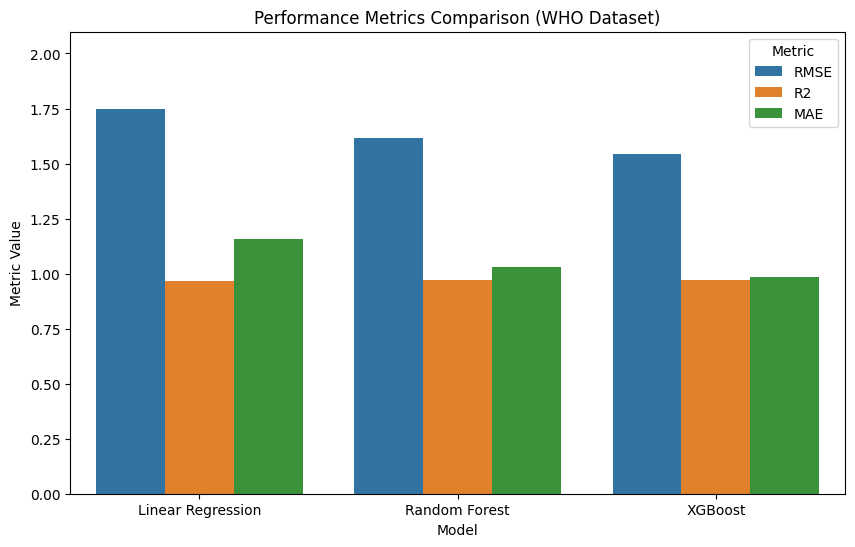

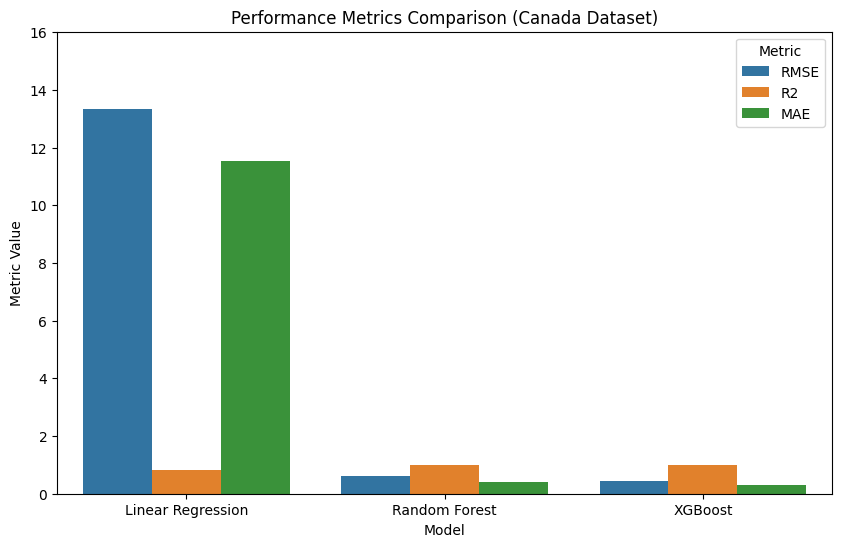

In [122]:
# Create a comparison dataframe from scores dictionary
def create_comparison_df(scores_dict):
    comp_df = pd.DataFrame(scores_dict).T.reset_index().rename(columns={'index': 'Model'})
    return comp_df

# Create comparison dataframes for WHO and Canada datasets
who_comp_df = create_comparison_df(who_scores)
canada_comp_df = create_comparison_df(canada_scores)

# Convert the wide format into long format for grouped bar charts
def melt_scores(comp_df):
    long_df = comp_df.melt(id_vars=['Model'], value_vars=['RMSE', 'R2', 'MAE'],
                             var_name='Metric', value_name='Value')
    return long_df

who_long = melt_scores(who_comp_df)
canada_long = melt_scores(canada_comp_df)

# Plot grouped bar chart for WHO dataset
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Value', hue='Metric', data=who_long)
plt.title('Performance Metrics Comparison (WHO Dataset)')
plt.ylabel('Metric Value')
plt.ylim(0, who_long['Value'].max()*1.2)  # Add extra space above bars
plt.legend(title='Metric')
plt.show()

# Plot grouped bar chart for Canada dataset
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Value', hue='Metric', data=canada_long)
plt.title('Performance Metrics Comparison (Canada Dataset)')
plt.ylabel('Metric Value')
plt.ylim(0, canada_long['Value'].max()*1.2)
plt.legend(title='Metric')
plt.show()


## Cross Data Prediction

In [123]:
# --- Functions to Align Datasets for Cross-Dataset Predictions ---

def align_canada_to_who(canada_df, who_numeric, who_categorical):

    df_aligned = pd.DataFrame()

    # Numeric: Map 'REF_DATE' to 'Year'
    if 'REF_DATE' in canada_df.columns and 'Year' in who_numeric:
        df_aligned['Year'] = canada_df['REF_DATE']
    else:
        df_aligned['Year'] = np.nan

    # For all other numeric features required by WHO, fill with NaN
    for col in who_numeric:
        if col not in df_aligned.columns:
            df_aligned[col] = np.nan

    # Categorical: Map 'GEO' -> 'Country'
    if 'GEO' in canada_df.columns and 'Country' in who_categorical:
        df_aligned['Country'] = canada_df['GEO']
    else:
        df_aligned['Country'] = np.nan

    # Map 'STATUS' -> 'Status'
    if 'STATUS' in canada_df.columns and 'Status' in who_categorical:
        df_aligned['Status'] = canada_df['STATUS']
    else:
        df_aligned['Status'] = np.nan

    return df_aligned

In [124]:
def align_who_to_canada(who_df, canada_numeric, canada_categorical):
    df_aligned = pd.DataFrame()

    # Numeric: Map 'Year' to 'REF_DATE'
    if 'Year' in who_df.columns and 'REF_DATE' in canada_numeric:
        df_aligned['REF_DATE'] = who_df['Year']
    else:
        df_aligned['REF_DATE'] = np.nan

    # For all other numeric features required by Canada, fill with NaN
    for col in canada_numeric:
        if col not in df_aligned.columns:
            df_aligned[col] = np.nan

    # Categorical: Map 'Country' -> 'GEO'
    if 'Country' in who_df.columns and 'GEO' in canada_categorical:
        df_aligned['GEO'] = who_df['Country']
    else:
        df_aligned['GEO'] = np.nan

    # Map 'Status' -> 'STATUS'
    if 'Status' in who_df.columns and 'STATUS' in canada_categorical:
        df_aligned['STATUS'] = who_df['Status']
    else:
        df_aligned['STATUS'] = np.nan

    # For remaining Canada categorical features, fill with NaN
    for col in canada_categorical:
        if col not in df_aligned.columns:
            df_aligned[col] = np.nan

    return df_aligned


Cross-Dataset (WHO model on Canada) Performance:
RMSE: 43.048303643592114
R2: -0.8302199716759722
MAE: 37.3067471590909


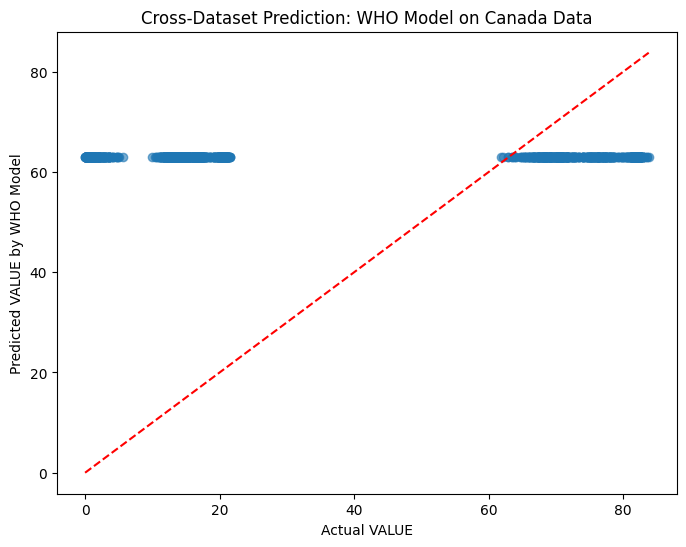

In [125]:
# --- Cross-Dataset Predictions ---

# Using WHO-trained Random Forest to predict on Canada data
who_rf_model = who_best_models['Random Forest']
try:
    # Align Canada dataset to WHO feature space
    canada_aligned_for_who = align_canada_to_who(canada_df, who_numeric, who_categorical)

    # Predict using the WHO model (which internally applies its preprocessor)
    canada_pred_from_who = who_rf_model.predict(canada_aligned_for_who)

    mse_cross = mean_squared_error(canada_df['VALUE'], canada_pred_from_who)
    print("Cross-Dataset (WHO model on Canada) Performance:")
    print("RMSE:", np.sqrt(mse_cross))
    print("R2:", r2_score(canada_df['VALUE'], canada_pred_from_who))
    print("MAE:", mean_absolute_error(canada_df['VALUE'], canada_pred_from_who))

    plt.figure(figsize=(8,6))
    plt.scatter(canada_df['VALUE'], canada_pred_from_who, alpha=0.6)
    plt.xlabel('Actual VALUE')
    plt.ylabel('Predicted VALUE by WHO Model')
    plt.title('Cross-Dataset Prediction: WHO Model on Canada Data')
    plt.plot([canada_df['VALUE'].min(), canada_df['VALUE'].max()],
             [canada_df['VALUE'].min(), canada_df['VALUE'].max()], 'r--')
    plt.show()
except Exception as e:
    print("Error in cross-dataset prediction (WHO->Canada):", e)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['STATUS' 'TERMINATED']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Cross-Dataset (Canada model on WHO) Performance:
RMSE: 11.832103506344138
R2: -0.5492671098076198
MAE: 8.742175988102682


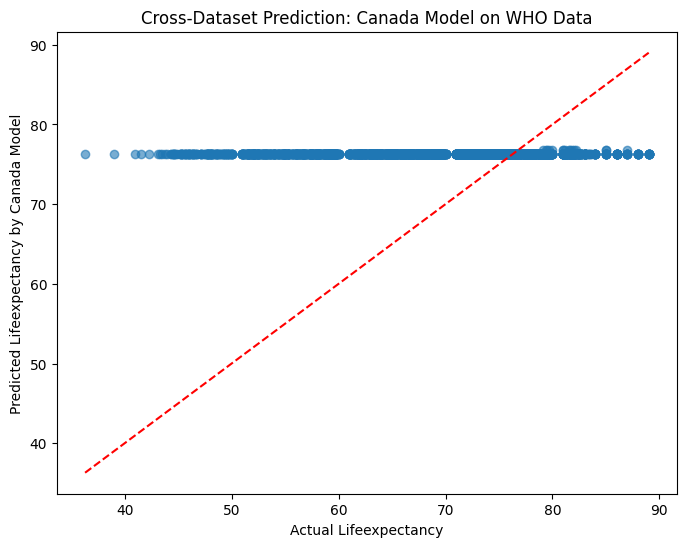

In [126]:
# Using Canada-trained Random Forest to predict on WHO data
canada_rf_model = canada_best_models['Random Forest']
try:
    # Align WHO dataset to Canada feature space
    who_aligned_for_canada = align_who_to_canada(who_df, canada_numeric, canada_categorical)

    # Predict using the Canada model (which applies its own preprocessor)
    who_pred_from_canada = canada_rf_model.predict(who_aligned_for_canada)

    mse_cross2 = mean_squared_error(who_df['Lifeexpectancy'], who_pred_from_canada)
    print("Cross-Dataset (Canada model on WHO) Performance:")
    print("RMSE:", np.sqrt(mse_cross2))
    print("R2:", r2_score(who_df['Lifeexpectancy'], who_pred_from_canada))
    print("MAE:", mean_absolute_error(who_df['Lifeexpectancy'], who_pred_from_canada))

    plt.figure(figsize=(8,6))
    plt.scatter(who_df['Lifeexpectancy'], who_pred_from_canada, alpha=0.6)
    plt.xlabel('Actual Lifeexpectancy')
    plt.ylabel('Predicted Lifeexpectancy by Canada Model')
    plt.title('Cross-Dataset Prediction: Canada Model on WHO Data')
    plt.plot([who_df['Lifeexpectancy'].min(), who_df['Lifeexpectancy'].max()],
             [who_df['Lifeexpectancy'].min(), who_df['Lifeexpectancy'].max()], 'r--')
    plt.show()
except Exception as e:
    print("Error in cross-dataset prediction (Canada->WHO):", e)
